In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import GridSearchCV, cross_val_score, learning_curve
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor

## Data Preprocessing and Exploratory Data Analysis

In [3]:
# Load the data
train_df = pd.read_csv('train.csv')

train_df

,index,Address,Possesion,Furnishing,Buildup_area,Carpet_area,Bathrooms,Property_age,Parking,Price,Brokerage,Floor,Per_sqft_price,BHK,Total_bedrooms
0,6250,"Arihant housing society, Sai Nagar, Kandivali ...",Ready to move,Semi Furnished,615.0,508.043150,1.0,12,0,14500000,14500000.0,7.0,23580.0,2.0,2.0
1,6523,"5 year tower, I C Colony, Borivali West, Mumbai",Ready to move,Semi Furnished,1200.0,724.772558,3.0,5,1,18500000,18500000.0,13.0,15420.0,2.0,2.0
2,4286,"Windsor Grande Residences, Mhada Colony, Andhe...",Ready to move,Semi Furnished,3300.0,2300.000000,5.0,6,3,125000000,1250000.0,32.0,37880.0,4.0,4.0
3,5038,"Maharashtra Nagar, Borivali West, Mumbai",Ready to move,Unfurnished,800.0,642.570682,1.0,25,1,16000000,16000000.0,4.0,20000.0,2.0,2.0
4,8491,"Bandra West, Mumbai",Ready to move,Semi Furnished,2000.0,1602.321210,4.0,10,2,85000000,85000000.0,12.0,42500.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6251,456,"Mumbai Port Trust, Mazgaon, Mumbai",Ready to move,Semi Furnished,580.0,386.000000,1.0,1,0,13000000,130000.0,23.0,22410.0,1.0,1.0
6252,24,"Atmosphere O2 Tower G, P&T Staff Colony, Mulun...",Ready to move,Semi Furnished,796.0,680.000000,2.0,1,2,20000000,200000.0,48.0,25130.0,2.0,2.0
6253,8879,"Gundecha Altura, Kanjurmarg West, Mumbai",Ready to move,Semi Furnished,700.0,700.000000,2.0,14,1,16000000,190000.0,18.0,22920.0,2.0,2.0
6254,7123,"Ajmera Bhakti Park, Bhakti Park, Wadala East, ...",Ready to move,Unfurnished,955.0,710.000000,2.0,10,1,18200000,190000.0,18.0,19110.0,2.0,2.0


In [4]:
test_df = pd.read_csv('test.csv')

### Task 1: Understanding the Dataset

In [97]:
unique_vals = train_df.nunique()

print("Unique values in each column:")
print(unique_vals)

Unique values in each column:
index             6256
Address           3223
Possesion            1
Furnishing           3
Buildup_area       944
Carpet_area       2520
Bathrooms           85
Property_age        46
Parking             10
Price              755
Brokerage         1517
Floor              125
Per_sqft_price    2501
BHK                  9
Total_bedrooms      27
dtype: int64


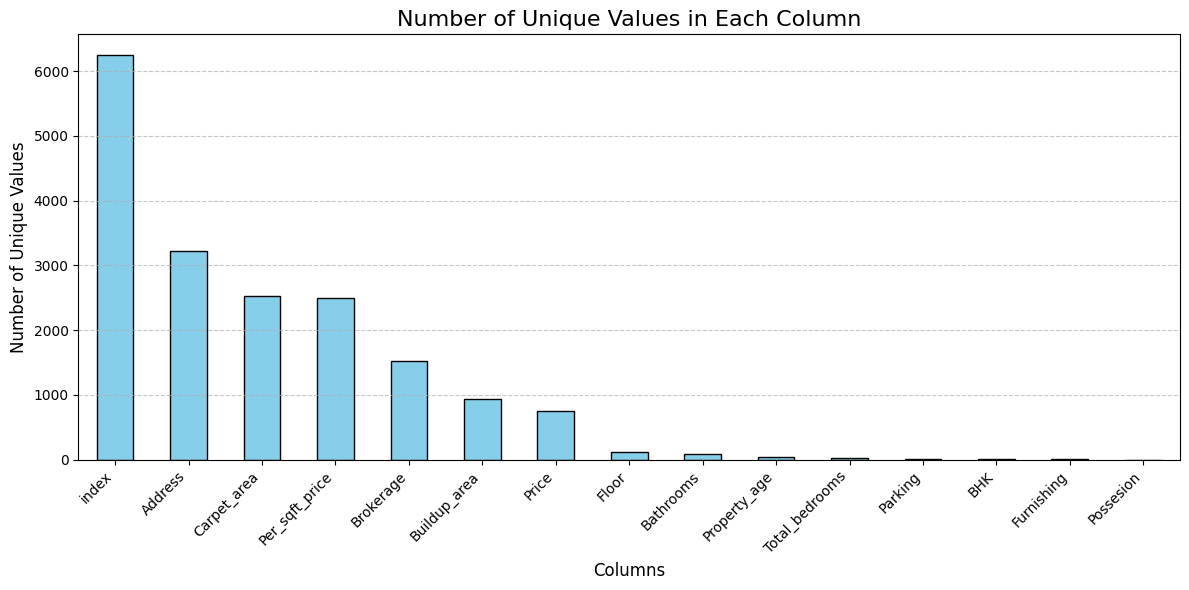

In [98]:
# plot unique values
plt.figure(figsize=(12, 6))
unique_vals.sort_values(ascending=False).plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Number of Unique Values in Each Column', fontsize=16)
plt.xlabel('Columns', fontsize=12)
plt.ylabel('Number of Unique Values', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

In [99]:
print("Data Types of Columns:\n", train_df.dtypes)

Data Types of Columns:
 index               int64
Address            object
Possesion          object
Furnishing         object
Buildup_area      float64
Carpet_area       float64
Bathrooms         float64
Property_age        int64
Parking             int64
Price               int64
Brokerage         float64
Floor             float64
Per_sqft_price    float64
BHK               float64
Total_bedrooms    float64
dtype: object


In [100]:
missing_values = train_df.isnull().sum()
print("Missing Values in Each Column:\n", missing_values)

Missing Values in Each Column:
 index             0
Address           0
Possesion         0
Furnishing        0
Buildup_area      0
Carpet_area       0
Bathrooms         0
Property_age      0
Parking           0
Price             0
Brokerage         0
Floor             0
Per_sqft_price    0
BHK               0
Total_bedrooms    0
dtype: int64


In [126]:
numerical_stats = train_df.describe()
print("Statistical Summary of Numerical Columns:\n")
numerical_stats

Statistical Summary of Numerical Columns:



,index,Buildup_area,Carpet_area,Bathrooms,Property_age,Parking,Price,Brokerage,Floor,Per_sqft_price,BHK,Total_bedrooms
count,6256.000000,6256.000000,6256.000000,6256.000000,6256.000000,6256.000000,6.256000e+03,6.256000e+03,6256.000000,6256.000000,6256.000000,6256.000000
mean,4879.818894,1120.690537,864.869801,1.968057,7.519661,1.298593,3.057852e+07,1.148133e+07,19.885595,23415.351551,2.159527,2.206878
std,2770.439333,735.147038,583.283918,0.911779,7.374092,0.797501,3.790301e+07,3.164281e+07,13.951480,13067.308580,1.002020,0.985628
min,1.000000,180.000000,150.000000,1.000000,1.000000,0.000000,7.800000e+05,0.000000e+00,2.000000,1440.000000,1.000000,1.000000
25%,2494.750000,650.000000,475.000000,1.000000,2.000000,1.000000,1.050000e+07,1.000000e+05,10.000000,15657.500000,1.000000,2.000000
50%,4920.500000,950.000000,708.315583,2.000000,5.000000,1.000000,1.920000e+07,2.500000e+05,16.000000,21355.000000,2.000000,2.000000
75%,7276.250000,1325.000000,1050.000000,2.000000,10.000000,2.000000,3.500000e+07,1.100000e+07,23.000000,28792.500000,3.000000,3.000000
max,9546.000000,15000.000000,14000.000000,10.000000,99.000000,9.000000,5.000000e+08,5.000000e+08,99.000000,100000.000000,10.000000,10.000000


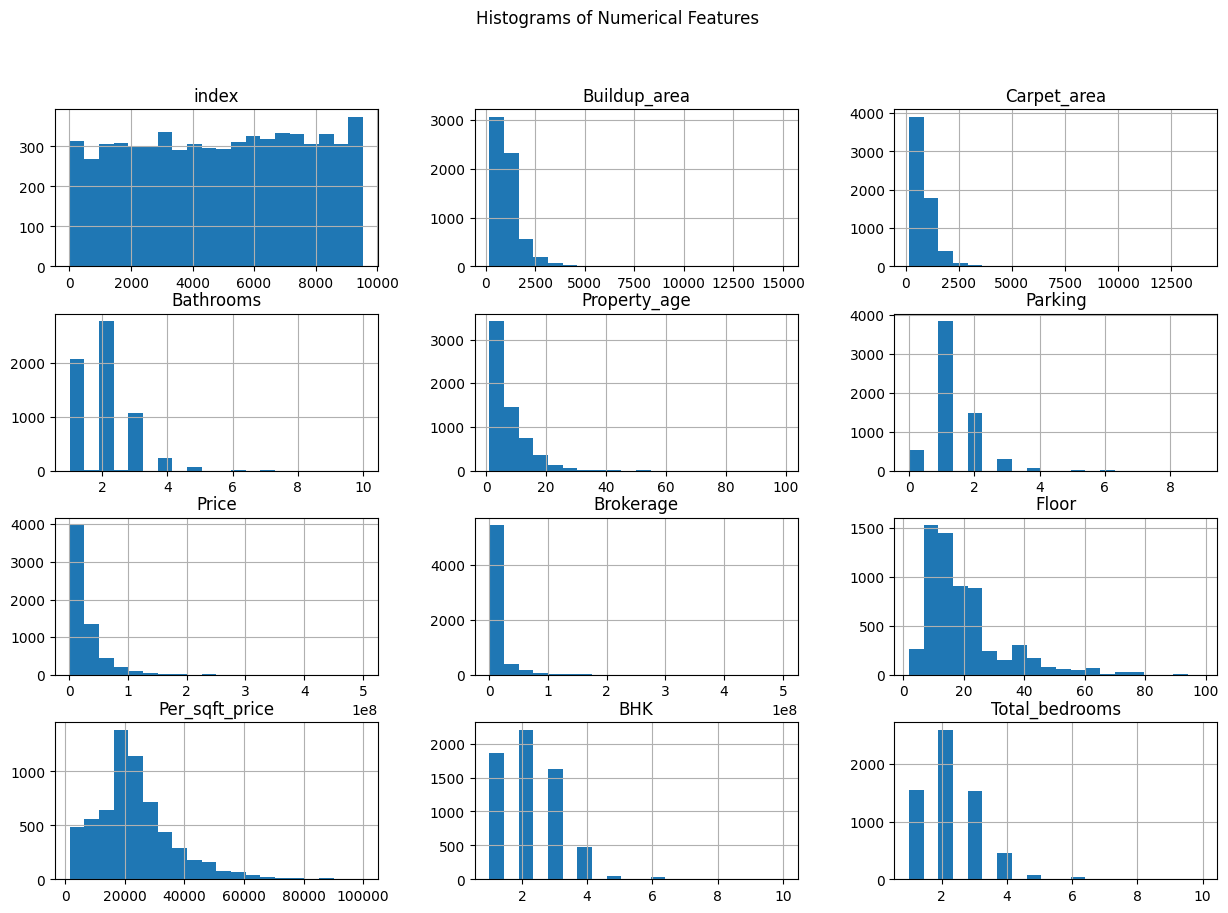

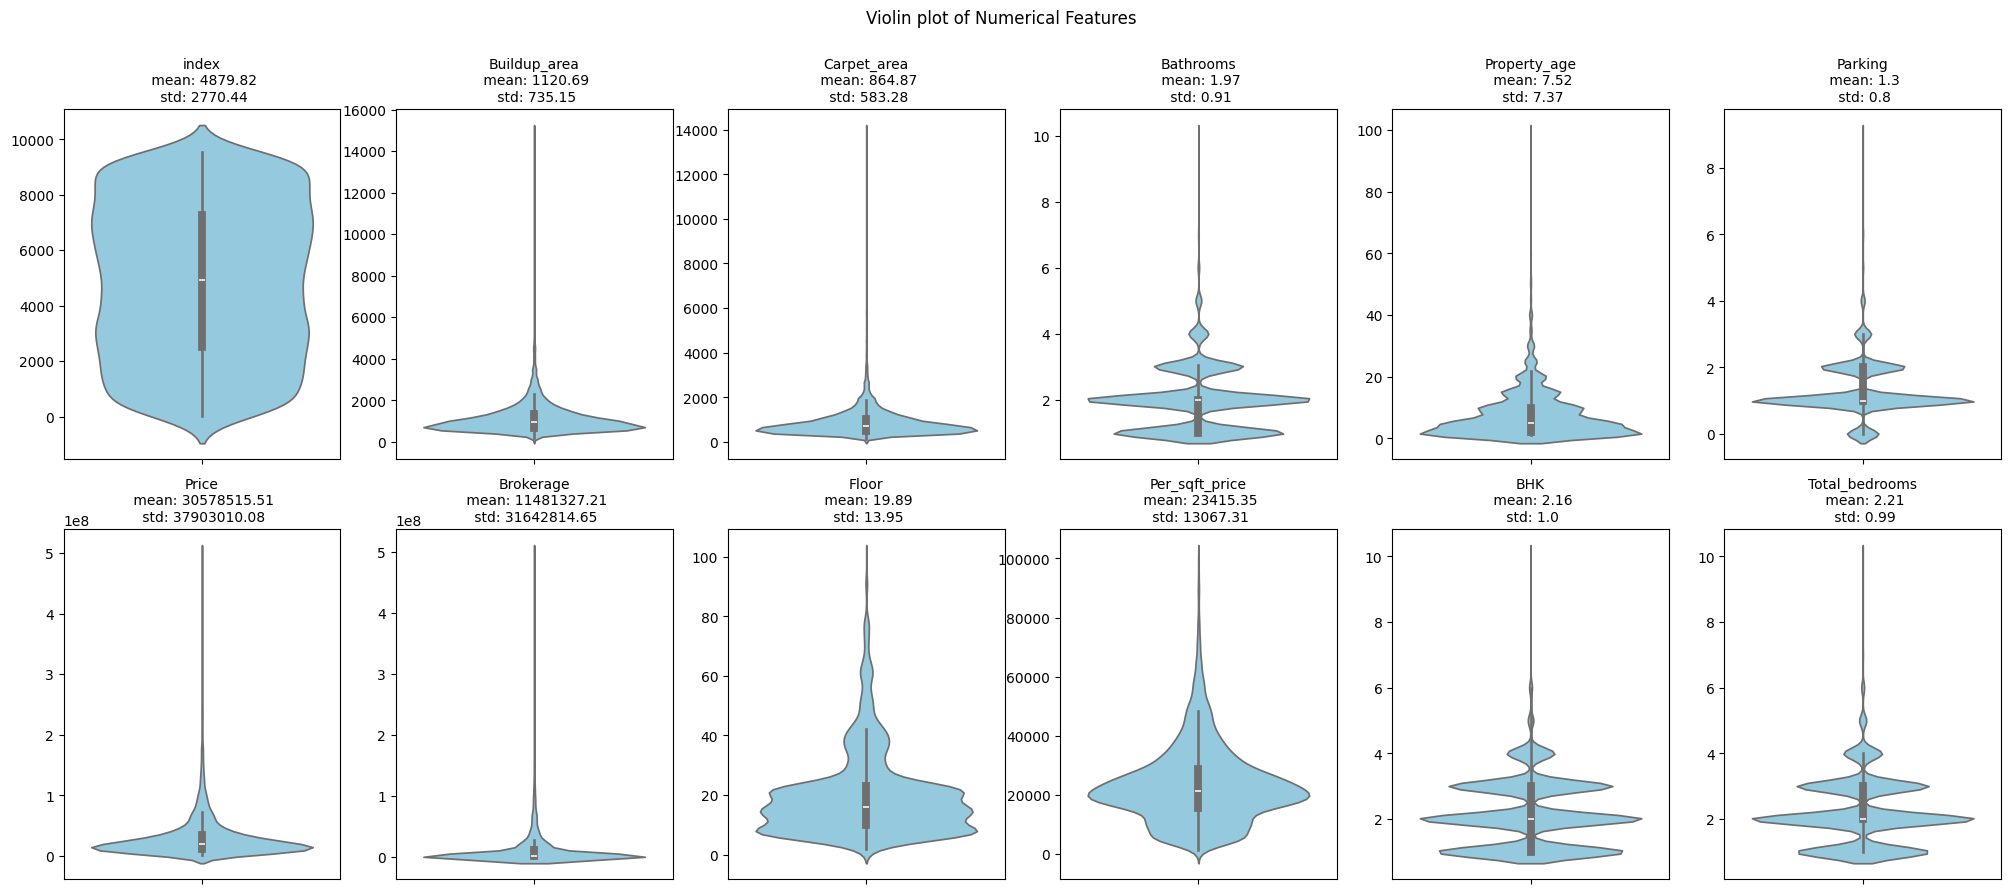

In [102]:
# Plot histograms for numerical columns
train_df.hist(bins=20, figsize=(15, 10))
plt.suptitle('Histograms of Numerical Features')
plt.show()

# Boxplot for outliers
plt.subplots(2, 6, figsize=(25, 10))
for i, col in enumerate(train_df.select_dtypes(include=np.number).columns):
    plt.subplot(2, 6, i + 1)
    sns.violinplot(y=train_df[col], color='skyblue', orient='v')
    plt.title(col + '\n mean: ' + str(round(train_df[col].mean(), 2)) + '\n std: ' + str(round(train_df[col].std(), 2)), fontsize=10)
    plt.ylabel('')
# plt.tight_layout()
plt.suptitle('Violin plot of Numerical Features')
plt.show()


Except for the 'index' column, all other columns are pretty imbalanced in the way they are distributed. 

### Task 5: Target Variable Imbalance Detection

In [29]:
range = np.arange(train_df['Price'].min(), train_df['Price'].max() + 1e3, 1e3)
range.size

499221

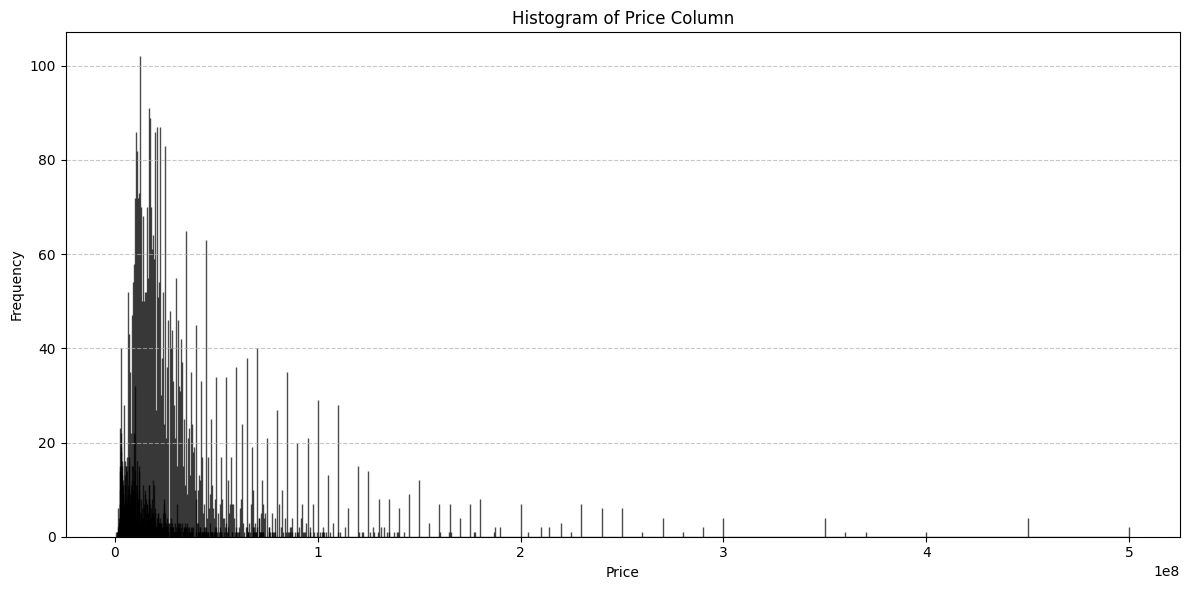

In [30]:
# bin the price column, such that each bin has 10 samples, and plot the histogram
plt.figure(figsize=(12, 6))
plt.hist(train_df['Price'], color='skyblue', histtype='bar', alpha=0.7, bins=range, edgecolor='black')
plt.title('Histogram of Price Column')
plt.xlabel('Price')
plt.ylabel('Frequency')
# plt.xscale('log')
# plt.yscale('log')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [5]:
# Get price percentiles
low_price = train_df['Price'].quantile(0.30)  # 25th percentile
high_price = train_df['Price'].quantile(0.80)  # 80th percentile
very_high_price = train_df['Price'].quantile(0.95)  # 95th percentile

# Define price categories based on quantiles
def categorize_price_quantiles(price):
    if price < low_price:
        return 'Low'
    elif low_price <= price < high_price:
        return 'Medium'
    elif high_price <= price < very_high_price:
        return 'High'
    else:
        return 'Very High'

train_df1 = train_df.copy()

# Apply categorization
train_df1['price_category'] = train_df1['Price'].apply(categorize_price_quantiles)
test_df['price_category'] = test_df['Price'].apply(categorize_price_quantiles)

# Check distribution of categories
price_category_counts = train_df1['price_category'].value_counts()
print("Distribution of Properties Across Price Categories (Quantiles):\n", price_category_counts)

Distribution of Properties Across Price Categories (Quantiles):
 price_category
Medium       3185
Low          1818
High          933
Very High     320
Name: count, dtype: int64


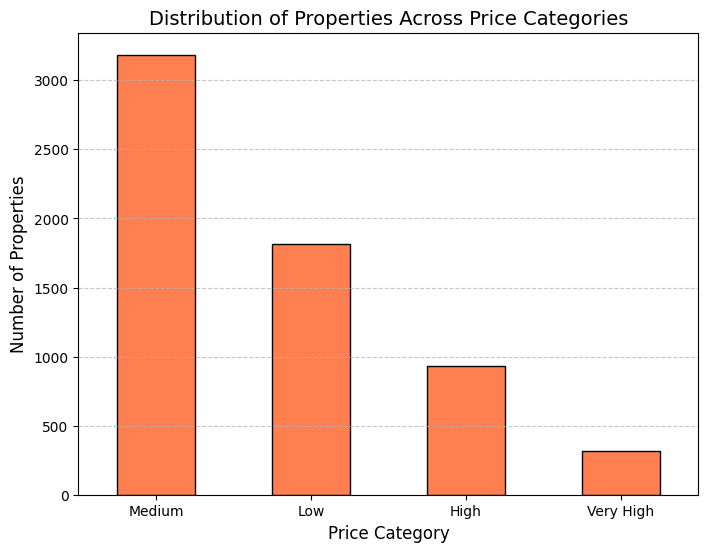

In [6]:
# Plot bar chart for price categories
plt.figure(figsize=(8, 6))
price_category_counts.plot(kind='bar', color='coral', edgecolor='black')
plt.title('Distribution of Properties Across Price Categories', fontsize=14)
plt.xlabel('Price Category', fontsize=12)
plt.ylabel('Number of Properties', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

We can see that the prices are distributed unevenly throughout the categories `Low`, `Medium`, `High`, and `Very High`. The `Medium` category has the maximum number of prices, while the `Very High` category has the least number of prices, indicating that the dataset is imbalanced.

### Task 3: Encoding Categorical Features

In [7]:
categorical_columns = train_df1.select_dtypes(include=['object']).columns

# Label Encoding
label_encoder = LabelEncoder()
train_df1[categorical_columns] = train_df1[categorical_columns].apply(lambda col: label_encoder.fit_transform(col))

test_df[categorical_columns] = test_df[categorical_columns].apply(lambda col: label_encoder.fit_transform(col))

print("Categorical columns after Label Encoding:\n")
train_df1[categorical_columns]

Categorical columns after Label Encoding:



,Address,Possesion,Furnishing,price_category
0,183,0,1,2
1,15,0,1,2
2,3106,0,1,3
3,1478,0,2,2
4,305,0,1,0
...,...,...,...,...
6251,1621,0,1,2
6252,246,0,1,2
6253,804,0,1,2
6254,107,0,2,2


We can see that `Address` is a high cardinality feature.
- High cardinality refers to the number of unique values in a column. It can pose a problem when using machine learning models because it can lead to overfitting.
- One way to mitigate high cardinality is to use dimensionality reduction techniques like PCA, LDA, or t-SNE. These techniques can help reduce the number of features in the dataset while preserving the most important information.
- Another way to mitigate high cardinality is to use feature engineering techniques like binning or grouping. This can help reduce the number of unique values in a column and make it easier for machine learning models to learn from the data.

In [8]:
# Select only numeric columns
numeric_columns = train_df1.select_dtypes(include=['number']).columns
numeric_df = train_df1[numeric_columns]

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

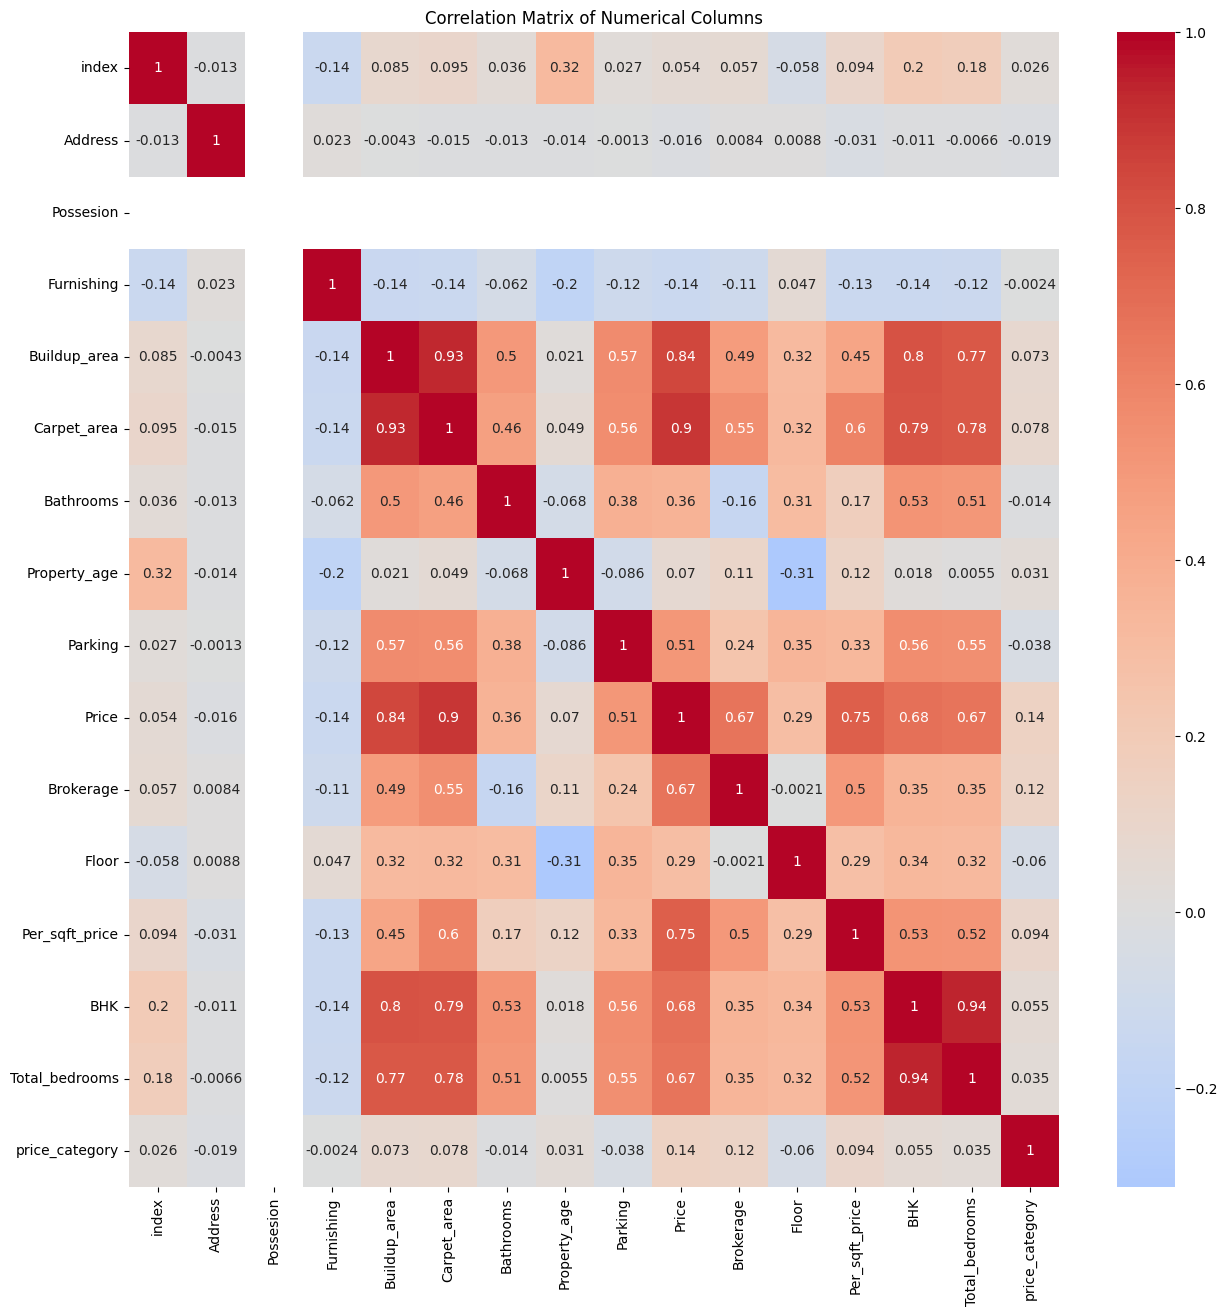

In [9]:
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numerical Columns')
plt.show()

### Task 2: Drop Irrelevant Columns

In [10]:
target = correlation_matrix['Price']
low_corr = target[(target >= -0.1) & (target <= 0.1)].index

print("Columns with low correlation to target:")
print(low_corr , 'and Possesion')

# Drop columns with low correlation
train_df1.drop(columns=low_corr, inplace=True)
train_df1.drop(columns='Possesion', inplace=True)

test_df.drop(columns=low_corr, inplace=True)
test_df.drop(columns='Possesion', inplace=True)

print("\nColumns after dropping low correlation columns:")
print(train_df1.columns)

Columns with low correlation to target:
Index(['index', 'Address', 'Property_age'], dtype='object') and Possesion

Columns after dropping low correlation columns:
Index(['Furnishing', 'Buildup_area', 'Carpet_area', 'Bathrooms', 'Parking',
       'Price', 'Brokerage', 'Floor', 'Per_sqft_price', 'BHK',
       'Total_bedrooms', 'price_category'],
      dtype='object')


We dropped the column `Possession` as it only had a single value: `0` for all rows. This column does not provide any useful information for the machine learning model and can be safely dropped.
The other three columns: `index`, `Address` and `Property_age` have been dropped as their correlation with the target variable is very low (between `-0.1` and `0.1`) and thus, they provide little to no information to the model.

### Task 6: Handling Imbalanced Data

Oversampling to handle imbalanced data

In [12]:
X = train_df1.drop(columns=['price_category'])
y = train_df1['price_category']

In [13]:
X.shape, y.shape

((6256, 11), (6256,))

In [14]:
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X, y)

In [129]:
undersampler = RandomUnderSampler(random_state=42)
X_resampled_u, y_resampled_u = undersampler.fit_resample(X, y)

In [15]:
X_resampled.shape, y_resampled.shape

((12740, 11), (12740,))

In [130]:
X_resampled_u.shape, y_resampled_u.shape

((1280, 11), (1280,))

In [16]:
X_resampled

,Furnishing,Buildup_area,Carpet_area,Bathrooms,Parking,Price,Brokerage,Floor,Per_sqft_price,BHK,Total_bedrooms
0,1,615.0,508.043150,1.0,0,14500000,14500000.0,7.0,23580.0,2.0,2.0
1,1,1200.0,724.772558,3.0,1,18500000,18500000.0,13.0,15420.0,2.0,2.0
2,1,3300.0,2300.000000,5.0,3,125000000,1250000.0,32.0,37880.0,4.0,4.0
3,2,800.0,642.570682,1.0,1,16000000,16000000.0,4.0,20000.0,2.0,2.0
4,1,2000.0,1602.321210,4.0,2,85000000,85000000.0,12.0,42500.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...
12735,2,3420.0,2689.305376,1.0,2,145000000,145000000.0,70.0,42400.0,4.0,4.0
12736,1,2790.0,2350.000000,4.0,1,104100000,1040000.0,30.0,37310.0,4.0,4.0
12737,1,2500.0,1926.633218,1.0,2,105000000,105000000.0,10.0,42000.0,4.0,4.0
12738,1,3024.0,1890.000000,4.0,1,105000000,1050000.0,30.0,34720.0,4.0,4.0


In [17]:
y_resampled

0        2
1        2
2        3
3        2
4        0
        ..
12735    3
12736    3
12737    3
12738    3
12739    3
Name: price_category, Length: 12740, dtype: int32

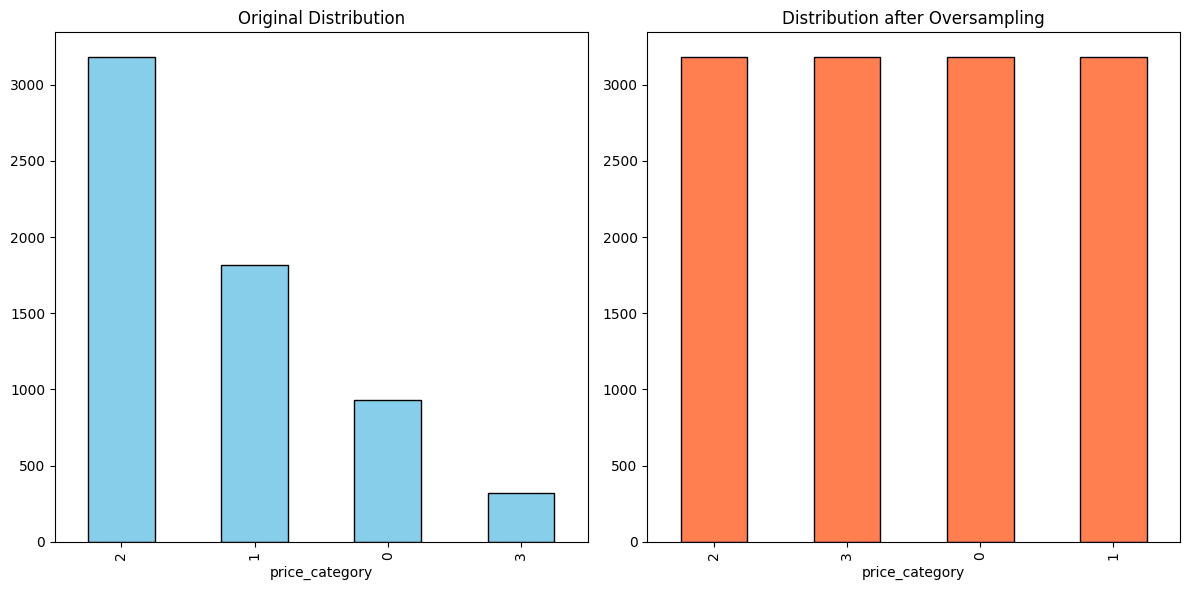

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
y.value_counts().plot(kind='bar', ax=ax[0], title='Original Distribution', color='skyblue', edgecolor='black')
y_resampled.value_counts().plot(kind='bar', ax=ax[1], title='Distribution after Oversampling', color='coral', edgecolor='black')
plt.tight_layout()
plt.show()

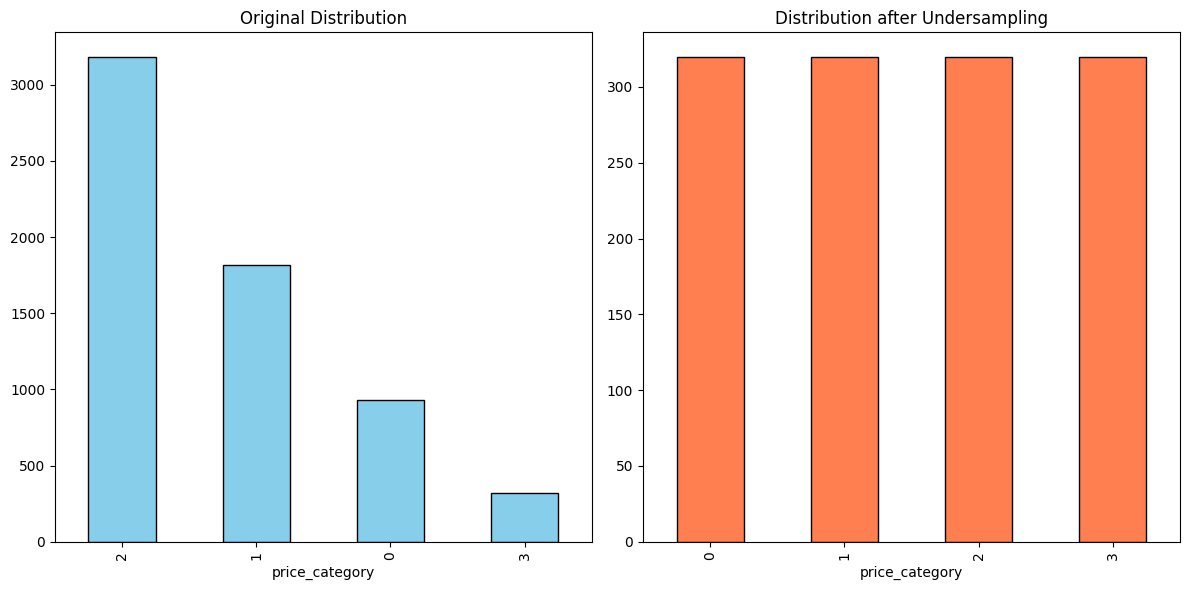

In [131]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
y.value_counts().plot(kind='bar', ax=ax[0], title='Original Distribution', color='skyblue', edgecolor='black')
y_resampled_u.value_counts().plot(kind='bar', ax=ax[1], title='Distribution after Undersampling', color='coral', edgecolor='black')
plt.tight_layout()
plt.show()

Benefits of oversampling:
- Helps to balance the distribution of the target variable in the dataset
- Can improve the performance of machine learning models by providing more data points for the minority class
- Can help reduce the risk of overfitting by providing more data points for the minority class

Limitations of oversampling:
- Can lead to overfitting if not done properly
- Can increase the computational cost of training machine learning models
- May lead to loss of information if not done carefully

Benefits of undersampling:
- Helps to balance the distribution of the target variable in the dataset
- Can reduce computational cost by reducing the number of data points in the dataset
- Can help improve the performance of machine learning models by providing more balanced data

Limitations of undersampling:
- Can lead to loss of information if not done carefully
- Can increase the risk of overfitting if not done properly
- May not be effective for highly imbalanced datasets

We can see that although oversampling can lead to potentially overfitting, it is a better choice in this case as the dataset is highly imbalanced and we need to balance the distribution of the target variable to improve the performance of the machine learning model. Undersampling in this case is reducing the amount of training data by a significant amount and may not provide enough data points for the model to learn from.

## Building Decision Tree Model

### Task 1: Model Training

In [19]:
y_resampled = X_resampled['Price']
X_resampled.drop(columns='Price', inplace=True)

y_test = test_df['Price']
X_test = test_df.drop(columns=['Price', 'price_category'])

In [20]:
X_resampled

,Furnishing,Buildup_area,Carpet_area,Bathrooms,Parking,Brokerage,Floor,Per_sqft_price,BHK,Total_bedrooms
0,1,615.0,508.043150,1.0,0,14500000.0,7.0,23580.0,2.0,2.0
1,1,1200.0,724.772558,3.0,1,18500000.0,13.0,15420.0,2.0,2.0
2,1,3300.0,2300.000000,5.0,3,1250000.0,32.0,37880.0,4.0,4.0
3,2,800.0,642.570682,1.0,1,16000000.0,4.0,20000.0,2.0,2.0
4,1,2000.0,1602.321210,4.0,2,85000000.0,12.0,42500.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...
12735,2,3420.0,2689.305376,1.0,2,145000000.0,70.0,42400.0,4.0,4.0
12736,1,2790.0,2350.000000,4.0,1,1040000.0,30.0,37310.0,4.0,4.0
12737,1,2500.0,1926.633218,1.0,2,105000000.0,10.0,42000.0,4.0,4.0
12738,1,3024.0,1890.000000,4.0,1,1050000.0,30.0,34720.0,4.0,4.0


In [21]:
X_test

,Furnishing,Buildup_area,Carpet_area,Bathrooms,Parking,Brokerage,Floor,Per_sqft_price,BHK,Total_bedrooms
0,2,987.0,650.000000,2.0,1,1.600000e+05,18.0,16010.0,2.0,2.0
1,1,1525.0,1226.550140,1.0,1,5.000000e+07,7.0,32790.0,3.0,3.0
2,2,940.0,714.000000,2.0,2,1.900000e+05,15.0,20740.0,2.0,2.0
3,0,750.0,864.305261,2.0,1,2.900000e+07,25.0,38670.0,2.0,2.0
4,1,1450.0,1107.106682,1.0,1,4.200000e+07,7.0,28960.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...
1559,1,810.0,600.000000,2.0,0,9.500000e+04,20.0,11730.0,2.0,2.0
1560,1,1150.0,666.000000,2.0,2,1.049824e+07,16.0,9130.0,2.0,2.0
1561,1,685.0,520.000000,2.0,2,2.479362e+06,21.0,20440.0,1.0,1.0
1562,2,700.0,479.950030,3.0,0,8.480809e+04,20.0,10000.0,1.0,2.0


In [62]:
df = pd.concat([X_resampled, y_resampled], axis=1)

df

,Furnishing,Buildup_area,Carpet_area,Bathrooms,Parking,Brokerage,Floor,Per_sqft_price,BHK,Total_bedrooms,Price
0,1,615.0,508.043150,1.0,0,14500000.0,7.0,23580.0,2.0,2.0,14500000
1,1,1200.0,724.772558,3.0,1,18500000.0,13.0,15420.0,2.0,2.0,18500000
2,1,3300.0,2300.000000,5.0,3,1250000.0,32.0,37880.0,4.0,4.0,125000000
3,2,800.0,642.570682,1.0,1,16000000.0,4.0,20000.0,2.0,2.0,16000000
4,1,2000.0,1602.321210,4.0,2,85000000.0,12.0,42500.0,3.0,3.0,85000000
...,...,...,...,...,...,...,...,...,...,...,...
12735,2,3420.0,2689.305376,1.0,2,145000000.0,70.0,42400.0,4.0,4.0,145000000
12736,1,2790.0,2350.000000,4.0,1,1040000.0,30.0,37310.0,4.0,4.0,104100000
12737,1,2500.0,1926.633218,1.0,2,105000000.0,10.0,42000.0,4.0,4.0,105000000
12738,1,3024.0,1890.000000,4.0,1,1050000.0,30.0,34720.0,4.0,4.0,105000000


## Data Preprocessing and Exploratory Data Analysis
### Task 4: Feature Scaling

In [63]:
scaler = StandardScaler()

X_resampled_scaled = scaler.fit_transform(X_resampled)
X_resampled_scaled = pd.DataFrame(X_resampled_scaled, columns=X_resampled.columns)

X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

X_resampled_scaled

,Furnishing,Buildup_area,Carpet_area,Bathrooms,Parking,Brokerage,Floor,Per_sqft_price,BHK,Total_bedrooms
0,-0.264792,-0.811331,-0.773208,-1.006961,-1.590266,-0.218191,-0.925890,-0.407898,-0.534891,-0.560129
1,-0.264792,-0.337538,-0.556477,0.612095,-0.623802,-0.152609,-0.577535,-0.846582,-0.534891,-0.560129
2,-0.264792,1.363257,1.018760,2.231150,1.309126,-0.435432,0.525588,0.360875,1.048591,1.013875
3,1.172553,-0.661499,-0.638680,-1.006961,-0.623802,-0.193598,-1.100067,-0.600359,-0.534891,-0.560129
4,-0.264792,0.310384,0.321077,1.421622,0.342662,0.937695,-0.635594,0.609248,0.256850,0.226873
...,...,...,...,...,...,...,...,...,...,...
12735,1.172553,1.460445,1.408068,-1.006961,0.342662,1.921428,2.731835,0.603872,1.048591,1.013875
12736,-0.264792,0.950207,1.068760,1.421622,-0.623802,-0.438876,0.409470,0.330232,1.048591,1.013875
12737,-0.264792,0.715335,0.645391,-1.006961,0.342662,1.265606,-0.751713,0.582368,1.048591,1.013875
12738,-0.264792,1.139724,0.608757,1.421622,-0.623802,-0.438712,0.409470,0.190992,1.048591,1.013875


In [22]:
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_resampled, y_resampled)

DecisionTreeRegressor(random_state=42)

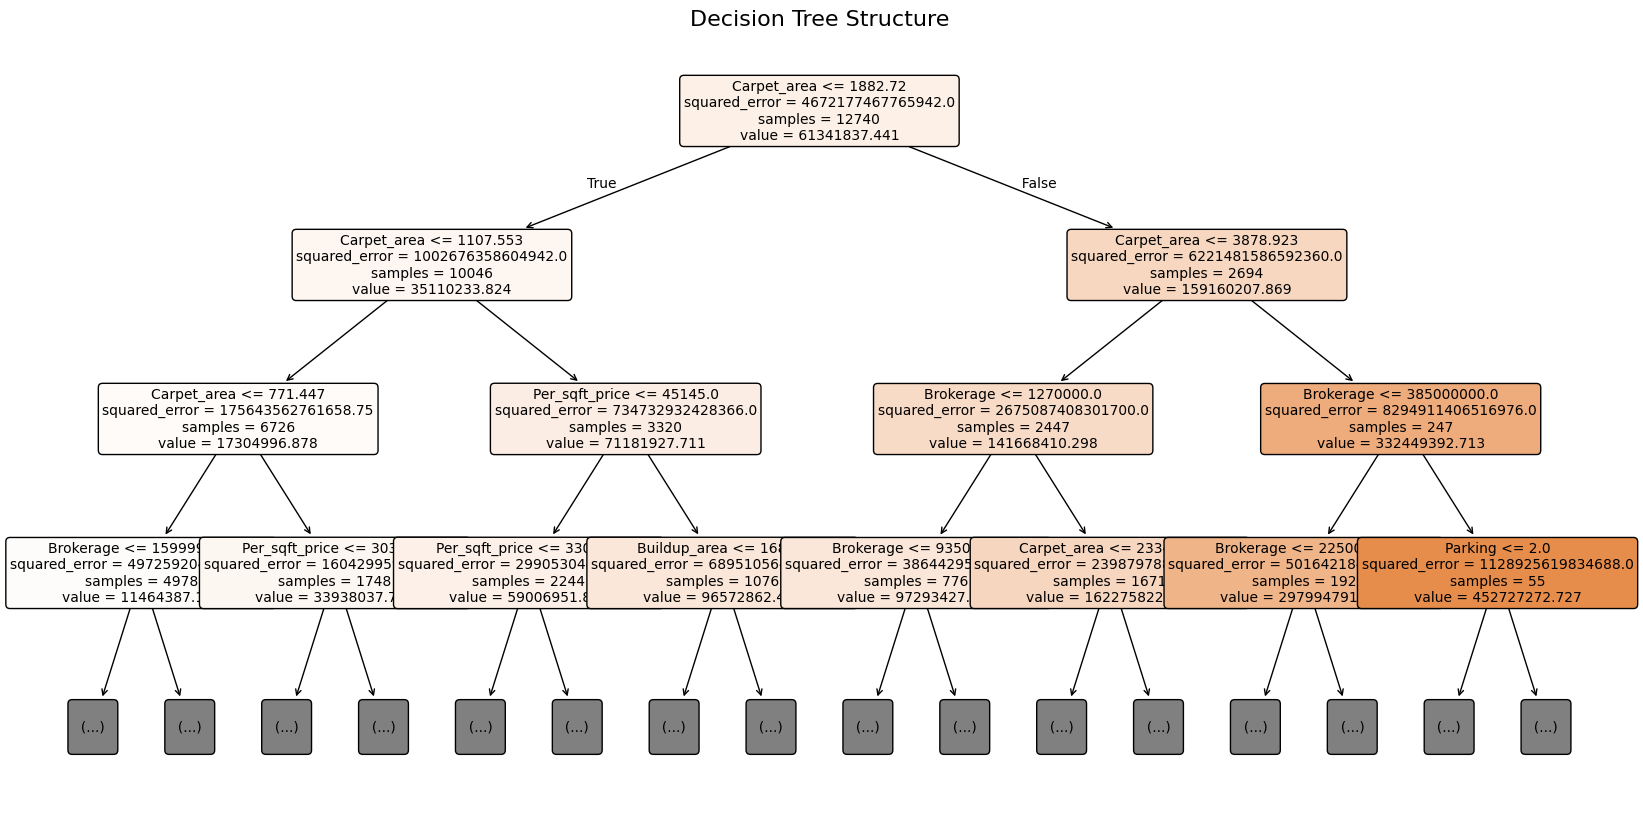

In [23]:
plt.figure(figsize=(20, 10))
plot_tree(dt, feature_names=X_resampled.columns, filled=True, rounded=True, fontsize=10, max_depth=3)
plt.title("Decision Tree Structure", fontsize=16)
plt.show()

In [24]:
dt.get_depth()

24

In [25]:
# performance of the model
dt.score(X_test, y_test)

0.9853041430148641

#### On scaled data

In [65]:
dt_scaled = DecisionTreeRegressor(random_state=42)
dt_scaled.fit(X_resampled_scaled, y_resampled)

DecisionTreeRegressor(random_state=42)

In [66]:
dt_scaled.get_depth()

24

In [67]:
dt_scaled.score(X_test_scaled, y_test)

0.978658306181366

We see that the model performance slightly decreased on the scaled data compared to the unscaled data. This could be due to the fact that decision trees are not sensitive to feature scaling, as they split the data based on the values of the features and do not rely on the magnitude of the values. Therefore, scaling the data may not have a significant impact on the performance of the decision tree model.

### Task 2: Feature Importance and Hyperparameter Tuning

In [26]:
feature_imp = dt.feature_importances_

feature_imp_df = pd.DataFrame({'Feature': X_resampled.columns, 'Importance': feature_imp}).sort_values(by='Importance', ascending=False)

feature_imp_df

,Feature,Importance
2,Carpet_area,0.833646
5,Brokerage,0.079610
7,Per_sqft_price,0.050397
1,Buildup_area,0.028021
6,Floor,0.006723
4,Parking,0.000790
3,Bathrooms,0.000438
8,BHK,0.000154
9,Total_bedrooms,0.000120
0,Furnishing,0.000100


#### Feature Importance on scaled data

In [68]:
feature_imp_scaled = dt_scaled.feature_importances_

feature_imp_df_scaled = pd.DataFrame({'Feature': X_resampled.columns, 'Importance': feature_imp_scaled}).sort_values(by='Importance', ascending=False)

feature_imp_df_scaled

,Feature,Importance
2,Carpet_area,0.835456
5,Brokerage,0.079412
7,Per_sqft_price,0.049678
1,Buildup_area,0.026606
6,Floor,0.006354
8,BHK,0.001064
9,Total_bedrooms,0.000887
4,Parking,0.000267
3,Bathrooms,0.000145
0,Furnishing,0.000131


We see that `Carpet_Area`, `Brokerage`, `Per_sqft_price` and `Buildup_area` are significantly more important than other features in predicting `Price`. It makes sense that these features are important, as they are directly related to the price of a property. For example, the `Carpet_Area` and `Buildup_area` of a property can have a significant impact on its price, as larger properties tend to be more expensive. Similarly, the `Per_sqft_price` and `Brokerage` can also influence the price of a property. The other features either are not as relevant or do not have as many variations in the data to be considered important.

In [27]:
param_grid = {"max_depth": [16, 20, 24, 28, 32],
                "min_samples_split": [2, 4, 8, 16, 32],
                "min_samples_leaf": [1, 2, 4, 8, 16],
                "max_features": [None, 'sqrt', 'log2'],
                "random_state": [42]}


grid_search = GridSearchCV(dt, param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_resampled, y_resampled)

Fitting 5 folds for each of 375 candidates, totalling 1875 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [16, 20, 24, 28, 32],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4, 8, 16],
                         'min_samples_split': [2, 4, 8, 16, 32],
                         'random_state': [42]},
             verbose=1)

In [28]:
grid_search.best_params_

{'max_depth': 20,
 'max_features': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'random_state': 42}

#### Grid search on scaled data

In [69]:
grid_search_scaled = GridSearchCV(dt_scaled, param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search_scaled.fit(X_resampled_scaled, y_resampled)

Fitting 5 folds for each of 375 candidates, totalling 1875 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [16, 20, 24, 28, 32],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4, 8, 16],
                         'min_samples_split': [2, 4, 8, 16, 32],
                         'random_state': [42]},
             verbose=1)

In [70]:
grid_search_scaled.best_params_

{'max_depth': 16,
 'max_features': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'random_state': 42}

In [29]:
dt2 = grid_search.best_estimator_
dt2.fit(X_resampled, y_resampled)

DecisionTreeRegressor(max_depth=20, random_state=42)

In [30]:
dt2.score(X_test, y_test)

0.9849228490004771

#### Decision tree on tuned model for scaled data

In [71]:
dt2_scaled = grid_search_scaled.best_estimator_
dt2_scaled.fit(X_resampled_scaled, y_resampled)

DecisionTreeRegressor(max_depth=16, random_state=42)

In [72]:
dt2_scaled.score(X_test_scaled, y_test)

0.9770602742022958

We see that the model performance has remained the same, rather dippedslightly after hyperparameter tuning. This is because the best hyperparameters given by grid search have a lesser depth and follow the same default parameters. This indicates that the default parameters of the decision tree model are already performing well on the scaled data and hyperparameter tuning did not significantly improve the model performance. At the same time the original model could potentially overfit.

### Task 3: Pruning Decison Tree

In [31]:
# Get cost complexity pruning path
path = dt2.cost_complexity_pruning_path(X_resampled, y_resampled)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

print("Cost Complexity Pruning Alphas:\n", ccp_alphas)
print("Impurities:\n", impurities)

Cost Complexity Pruning Alphas:
 [0.00000000e+00 3.59759297e+01 3.92464678e+01 ... 5.06451708e+14
 6.40964630e+14 2.56593272e+15]
Impurities:
 [1.97565092e+08 1.97565164e+08 1.97565203e+08 ... 1.46528012e+15
 2.10624475e+15 4.67217747e+15]


In [32]:
ccp_alphas.size

3321

In [33]:
trees = []
for ccp_alpha in ccp_alphas:
    tree = DecisionTreeRegressor(random_state=42, ccp_alpha=ccp_alpha)
    tree.fit(X_resampled, y_resampled)
    trees.append(tree) 

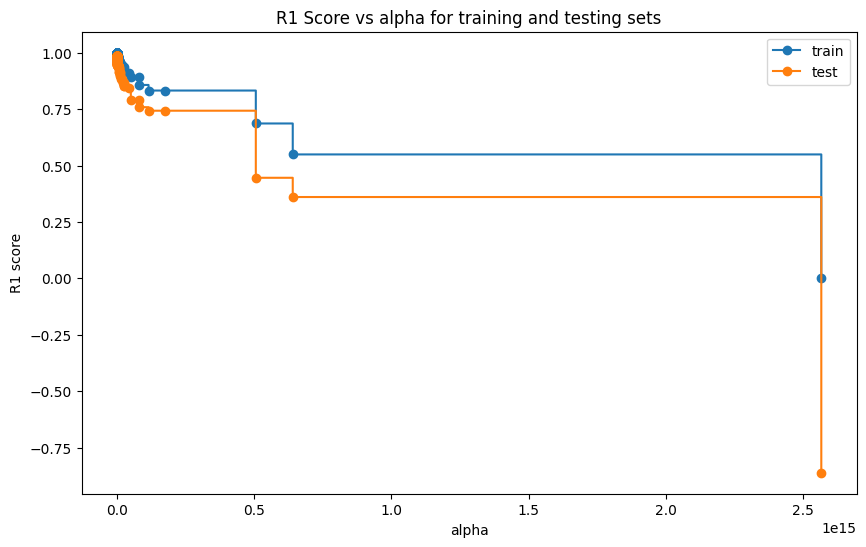

In [34]:
train_scores = [tree.score(X_resampled, y_resampled) for tree in trees] 
test_scores = [tree.score(X_test, y_test) for tree in trees]

plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, train_scores, marker='o', label='train', drawstyle='steps-post')
plt.plot(ccp_alphas, test_scores, marker='o', label='test', drawstyle='steps-post')
plt.xlabel('alpha')
plt.ylabel('R1 score')
plt.title('R1 Score vs alpha for training and testing sets')
plt.legend()
plt.show()


Best Alpha: 13082155.939293073


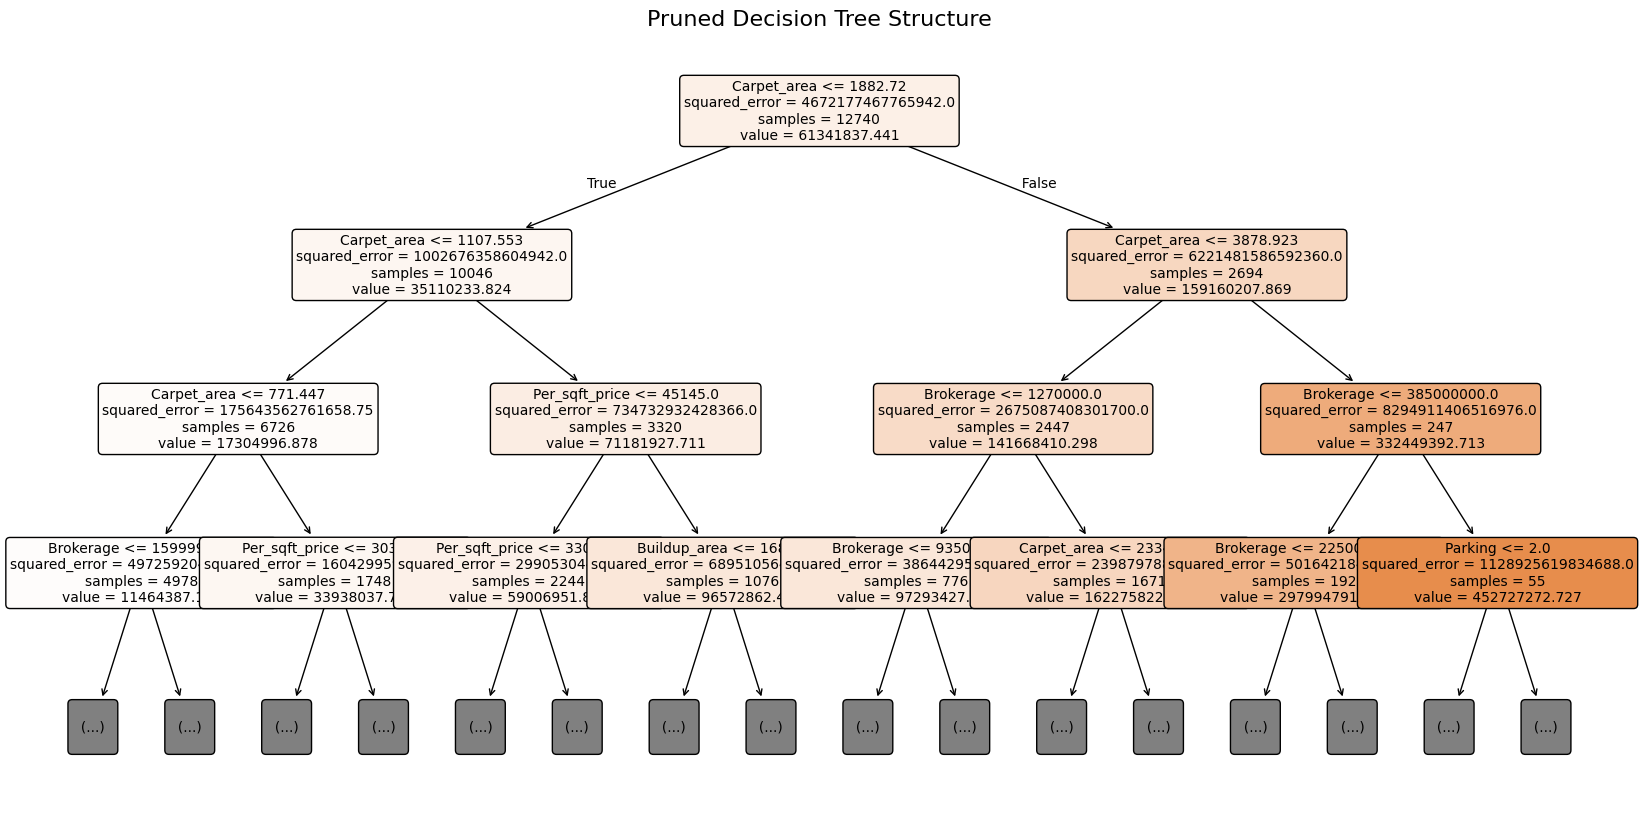

In [35]:
# visulaising the best pruned tree
best_alpha = ccp_alphas[np.argmax(test_scores)]
best_tree = DecisionTreeRegressor(random_state=42, ccp_alpha=best_alpha)

best_tree.fit(X_resampled, y_resampled)

print("Best Alpha:", best_alpha)

plt.figure(figsize=(20, 10))
plot_tree(best_tree, feature_names=X_resampled.columns, filled=True, rounded=True, fontsize=10, max_depth=3)
plt.title("Pruned Decision Tree Structure", fontsize=16)
plt.show()

In [36]:
print("R1 Score of Best Pruned Tree:", best_tree.score(X_test, y_test))

R1 Score of Best Pruned Tree: 0.9853120456771669


In [37]:
best_tree.get_depth()

21

#### Pruning decision tree on tuned model for scaled data

In [73]:
# Get cost complexity pruning path for scaled data
path_scaled = dt2_scaled.cost_complexity_pruning_path(X_resampled_scaled, y_resampled)
ccp_alphas_scaled, impurities_scaled = path_scaled.ccp_alphas, path_scaled.impurities

print("Cost Complexity Pruning Alphas for Scaled Data:\n", ccp_alphas_scaled)
print("Impurities for Scaled Data:\n", impurities_scaled)

Cost Complexity Pruning Alphas for Scaled Data:
 [0.00000000e+00 5.23286229e+01 6.27943485e+01 ... 5.06451708e+14
 6.40964630e+14 2.56593272e+15]
Impurities for Scaled Data:
 [1.49387002e+10 1.49387002e+10 1.49387003e+10 ... 1.46528012e+15
 2.10624475e+15 4.67217747e+15]


In [74]:
trees_scaled = []
for ccp_alpha in ccp_alphas_scaled:
    tree = DecisionTreeRegressor(random_state=42, ccp_alpha=ccp_alpha)
    tree.fit(X_resampled_scaled, y_resampled)
    trees_scaled.append(tree)

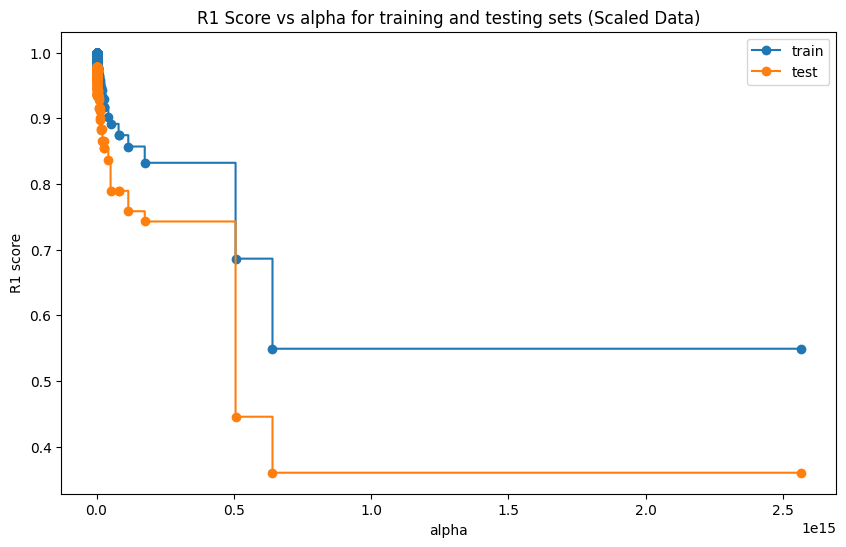

In [75]:
train_scores_scaled = [tree.score(X_resampled_scaled, y_resampled) for tree in trees_scaled]
test_scores_scaled = [tree.score(X_test_scaled, y_test) for tree in trees_scaled]

plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas_scaled, train_scores_scaled, marker='o', label='train', drawstyle='steps-post')
plt.plot(ccp_alphas_scaled, test_scores_scaled, marker='o', label='test', drawstyle='steps-post')
plt.xlabel('alpha')
plt.ylabel('R1 score')
plt.title('R1 Score vs alpha for training and testing sets (Scaled Data)')
plt.legend()
plt.show()

In [76]:
best_alpha_scaled = ccp_alphas_scaled[np.argmax(test_scores_scaled)]
best_tree_scaled = DecisionTreeRegressor(random_state=42, ccp_alpha=best_alpha_scaled)

best_tree_scaled.fit(X_resampled_scaled, y_resampled)

print("Best Alpha for Scaled Data:", best_alpha_scaled)

Best Alpha for Scaled Data: 39246467.81789639


In [77]:
print("R1 Score of Best Pruned Tree for Scaled Data:", best_tree_scaled.score(X_test_scaled, y_test))

R1 Score of Best Pruned Tree for Scaled Data: 0.978665147499024


In [78]:
print("Depth of Best Pruned Tree for Scaled Data:", best_tree_scaled.get_depth())

Depth of Best Pruned Tree for Scaled Data: 20


We see that pruning not only decreased the maximum depth of he tree but also improved the model performance. This indicates that the original decision tree model was overfitting the data and pruning helped to reduce the overfitting and improve the generalization of the model. The pruned decision tree model has a lower maximum depth and performs better on the test data compared to the original decision tree model.

### Task 4: Handling Overfitting

In [52]:
cv_scores = cross_val_score(dt2, X_resampled, y_resampled, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
cv_scores = -cv_scores
mean_cv_score = np.mean(cv_scores)

print("Mean Cross-Validation Score:", mean_cv_score)
print(f"Cross-Validation MSE Scores: {cv_scores}")

Mean Cross-Validation Score: 1342230677240.8198
Cross-Validation MSE Scores: [2.77628833e+12 2.12360750e+12 1.81101342e+12 2.44135721e+08
 0.00000000e+00]


In [53]:
# Generate learning curve data
train_sizes, train_scores, test_scores = learning_curve(dt2, X_resampled, y_resampled, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

train_errors, test_errors = -train_scores, -test_scores

train_errors_mean = np.mean(train_errors, axis=1)
test_errors_mean = np.mean(test_errors, axis=1)


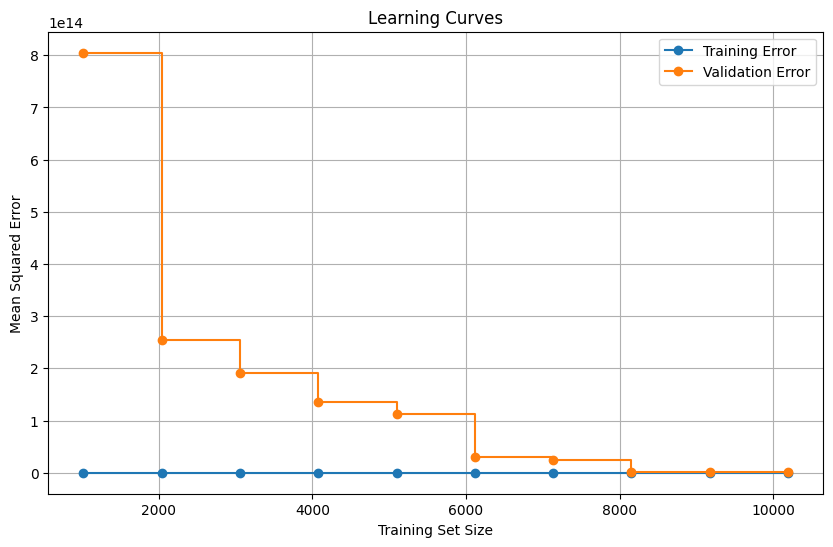

In [54]:
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_errors_mean, marker='o', label='Training Error', drawstyle='steps-post')
plt.plot(train_sizes, test_errors_mean, marker='o', label='Validation Error', drawstyle='steps-post')
plt.xlabel('Training Set Size')
plt.ylabel('Mean Squared Error')
plt.title('Learning Curves')
plt.legend()
plt.grid()
plt.show()

#### On scaled data

In [79]:
cv_scores_scaled = cross_val_score(dt2_scaled, X_resampled_scaled, y_resampled, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
cv_scores_scaled = -cv_scores_scaled
mean_cv_score_scaled = np.mean(cv_scores_scaled)

print("Mean Cross-Validation Score for Scaled Data:", mean_cv_score_scaled)

Mean Cross-Validation Score for Scaled Data: 1383017394960.9663


In [80]:
# Generate learning curve data for scaled data
train_sizes_scaled, train_scores_scaled, test_scores_scaled = learning_curve(dt2_scaled, X_resampled_scaled, y_resampled, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

train_errors_scaled, test_errors_scaled = -train_scores_scaled, -test_scores_scaled

train_errors_mean_scaled = np.mean(train_errors_scaled, axis=1)
test_errors_mean_scaled = np.mean(test_errors_scaled, axis=1)

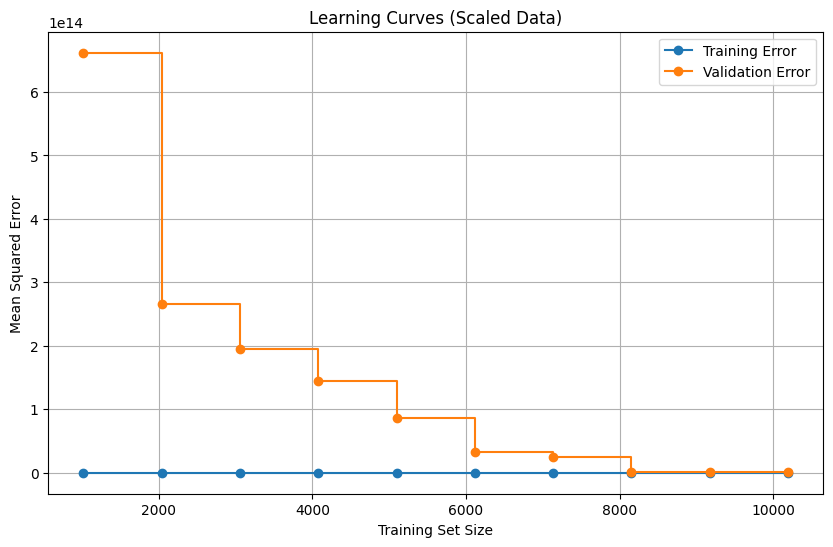

In [81]:
plt.figure(figsize=(10, 6))
plt.plot(train_sizes_scaled, train_errors_mean_scaled, marker='o', label='Training Error', drawstyle='steps-post')
plt.plot(train_sizes_scaled, test_errors_mean_scaled, marker='o', label='Validation Error', drawstyle='steps-post')
plt.xlabel('Training Set Size')
plt.ylabel('Mean Squared Error')
plt.title('Learning Curves (Scaled Data)')
plt.legend()
plt.grid()
plt.show()

The learning curve suggests that when the training set size is small the model is overfitting. As the training set size increases, the model starts to generalize better and the gap between the training and validation scores decreases. This indicates that the model is overfitting when the training set size is small and performs better as the training set size increases, suggesting that increasing the training set size can help reduce overfitting and improve the generalization of the model.\
Thus, cross validation helps in controlling overfitting by providing a more reliable estimate of the model's performance on unseen data.

## Model Evaluation and Error Analysis

### Task 1: Model Evaluation

In [56]:
# Predictions on training and test datasets
train_predictions = dt2.predict(X_resampled)
test_predictions = dt2.predict(X_test)

# Calculate evaluation metrics
train_mse = mean_squared_error(y_resampled, train_predictions)
train_mae = mean_absolute_error(y_resampled, train_predictions)
train_r2 = r2_score(y_resampled, train_predictions)

test_mse = mean_squared_error(y_test, test_predictions)
test_mae = mean_absolute_error(y_test, test_predictions)
test_r2 = r2_score(y_test, test_predictions)

print("Training Set Metrics:")
print("Mean Squared Error:", train_mse)
print("Mean Absolute Error:", train_mae)
print("R2 Score:", train_r2)

print("\nTest Set Metrics:")
print("Mean Squared Error:", test_mse)
print("Mean Absolute Error:", test_mae)
print("R2 Score:", test_r2)

Training Set Metrics:
Mean Squared Error: 197565092.23083872
Mean Absolute Error: 1191.381915017792
R2 Score: 0.9999999577145574

Test Set Metrics:
Mean Squared Error: 17614173680796.12
Mean Absolute Error: 1087772.3951556212
R2 Score: 0.9849228490004771


#### On scaled data

In [82]:
train_predictions_scaled = dt2_scaled.predict(X_resampled_scaled)
test_predictions_scaled = dt2_scaled.predict(X_test_scaled)

train_mse_scaled = mean_squared_error(y_resampled, train_predictions_scaled)
train_mae_scaled = mean_absolute_error(y_resampled, train_predictions_scaled)
train_r2_scaled = r2_score(y_resampled, train_predictions_scaled)

test_mse_scaled = mean_squared_error(y_test, test_predictions_scaled)
test_mae_scaled = mean_absolute_error(y_test, test_predictions_scaled)
test_r2_scaled = r2_score(y_test, test_predictions_scaled)

print("Training Set Metrics for Scaled Data:")
print("Mean Squared Error:", train_mse_scaled)
print("Mean Absolute Error:", train_mae_scaled)
print("R2 Score:", train_r2_scaled)

print("\nTest Set Metrics for Scaled Data:")
print("Mean Squared Error:", test_mse_scaled)
print("Mean Absolute Error:", test_mae_scaled)
print("R2 Score:", test_r2_scaled)

Training Set Metrics for Scaled Data:
Mean Squared Error: 14938700176.414694
Mean Absolute Error: 29737.657850570882
R2 Score: 0.9999968026256966

Test Set Metrics for Scaled Data:
Mean Squared Error: 26799778977035.344
Mean Absolute Error: 1146587.774322541
R2 Score: 0.9770602742022958


We can see that the model tuned model generalises well on the testing data given the performance metrics and does not learn the training data too well.

### Task 2 : Residual and Error Analysis

In [83]:
# calculate the residuals
train_residuals = y_resampled - train_predictions
test_residuals = y_test - test_predictions

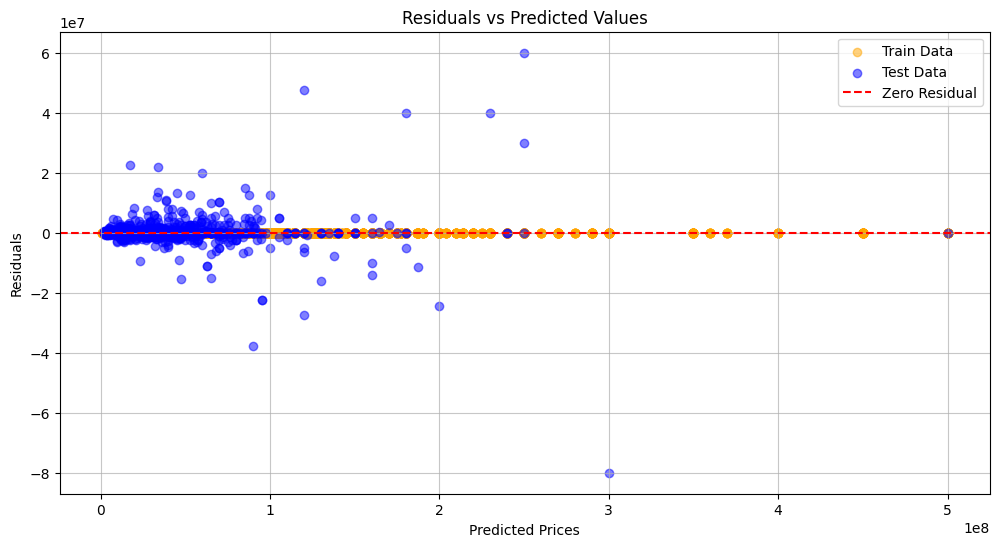

In [85]:
plt.figure(figsize=(12, 6))
plt.scatter(train_predictions, train_residuals, alpha=0.5, label='Train Data', color='orange')
plt.scatter(test_predictions, test_residuals, alpha=0.5, label='Test Data', color='blue')
plt.axhline(y=0, color='red', linestyle='--', label='Zero Residual')
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.legend()
plt.grid(alpha=0.7)
plt.show()

#### On scaled data

In [86]:
train_residuals_scaled = y_resampled - train_predictions_scaled
test_residuals_scaled = y_test - test_predictions_scaled

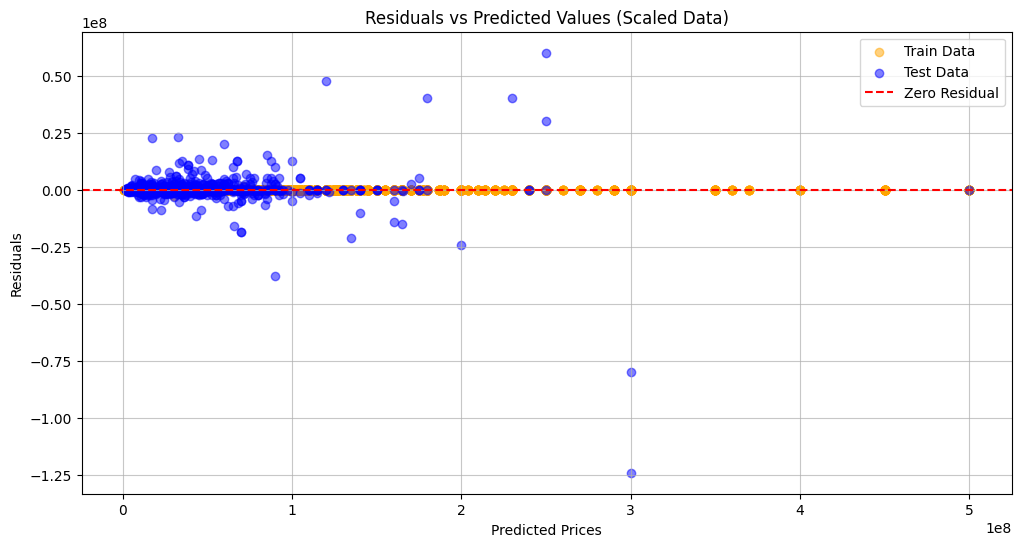

In [87]:
plt.figure(figsize=(12, 6))
plt.scatter(train_predictions_scaled, train_residuals_scaled, alpha=0.5, label='Train Data', color='orange')
plt.scatter(test_predictions_scaled, test_residuals_scaled, alpha=0.5, label='Test Data', color='blue')
plt.axhline(y=0, color='red', linestyle='--', label='Zero Residual')
plt.title('Residuals vs Predicted Values (Scaled Data)')
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.legend()
plt.grid(alpha=0.7)
plt.show()

We see that the `Low` and `Medium` price categories have the highest residuals. This is because the `High` and `Very High` categories had fewer data points and while oversampling these points were repeated randomly multiple times. This could have led to the model learning the `High` and `Very High` categories better than the `Low` and `Medium` categories. This could be a limitation of oversampling and could be addressed by using more advanced techniques like SMOTE or ADASYN to generate synthetic data points for the minority class.\
This model can thus be improved by having more data points for the `High` and `Very High` categories to balance the distribution of the target variable and improve the performance of the model overall.

### Task 3 : Feature Importance based analysis

In [91]:
top_features = feature_imp_df['Feature'].head(3)
print("Top 3 Important Features:\n", top_features)

Top 3 Important Features:
 2       Carpet_area
5         Brokerage
7    Per_sqft_price
Name: Feature, dtype: object



Analysis for Carpet_area:
RMSE using only Carpet_area: 12941201.097990273


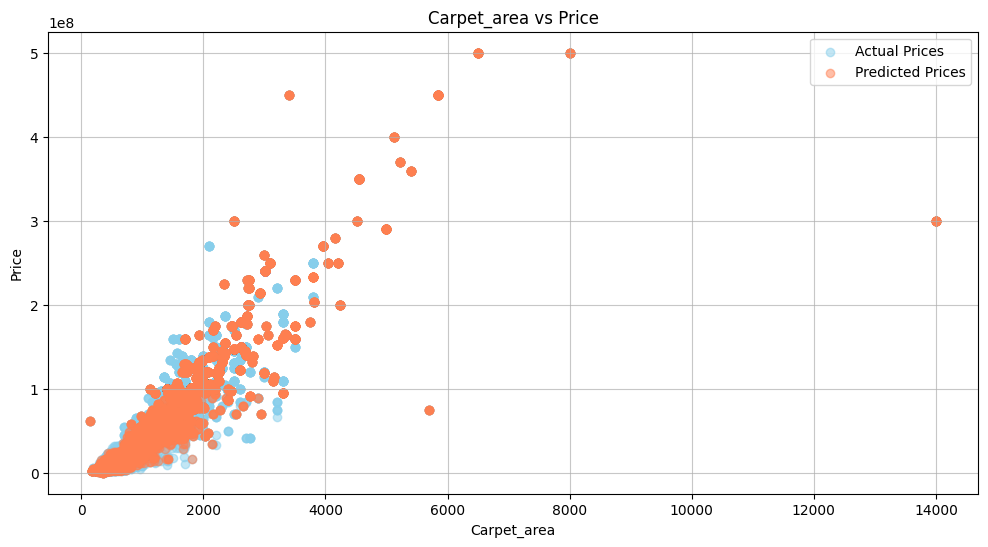


Analysis for Brokerage:
RMSE using only Brokerage: 9556300.092973372


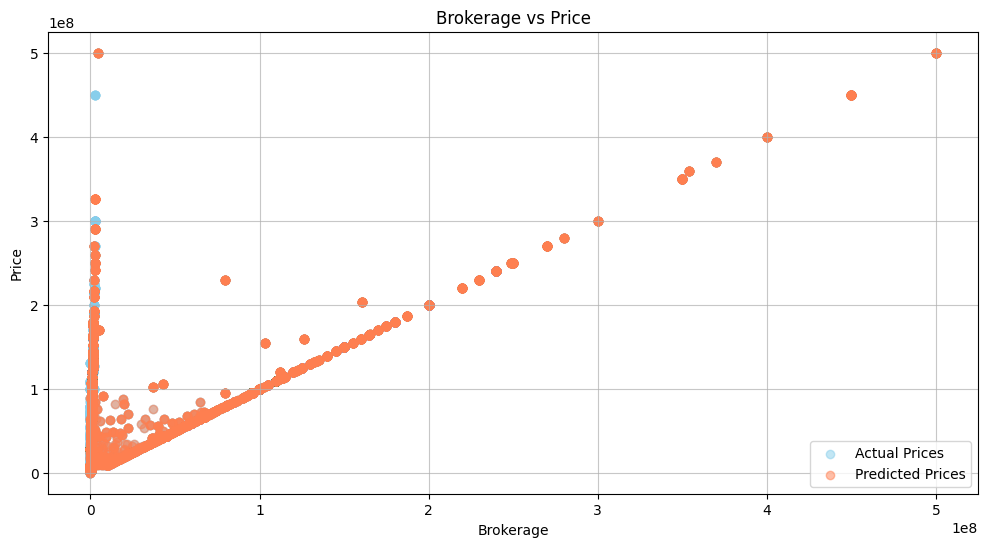


Analysis for Per_sqft_price:
RMSE using only Per_sqft_price: 26662543.056599308


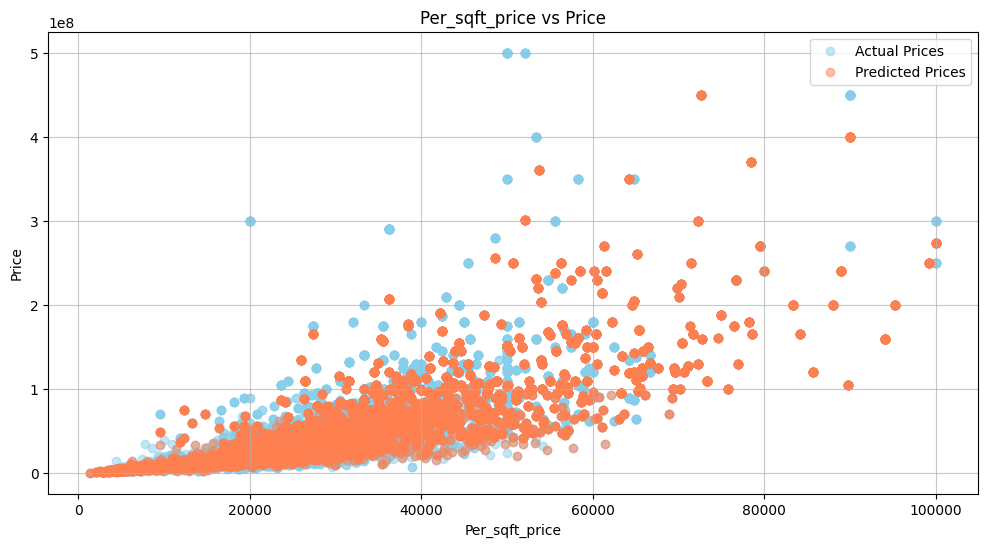

In [94]:
for feature in top_features:
    print(f"\nAnalysis for {feature}:")

    X_feature = X_resampled[[feature]]
    dt_feature = DecisionTreeRegressor(random_state=42)
    dt_feature.fit(X_feature, y_resampled)

    preds = dt_feature.predict(X_feature)

    rmse = np.sqrt(mean_squared_error(y_resampled, preds))
    print(f"RMSE using only {feature}:", rmse)

    plt.figure(figsize=(12, 6))
    plt.scatter(X_feature, y_resampled, color='skyblue', alpha=0.5, label='Actual Prices')
    plt.scatter(X_feature, preds, color='coral', alpha=0.5, label='Predicted Prices')
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.title(f'{feature} vs Price')
    plt.legend()
    plt.grid(alpha=0.7)
    plt.show()

#### On scaled data

In [95]:
top_features_scaled = feature_imp_df_scaled['Feature'].head(3)
print("Top 3 Important Features for Scaled Data:\n", top_features_scaled)

Top 3 Important Features for Scaled Data:
 2       Carpet_area
5         Brokerage
7    Per_sqft_price
Name: Feature, dtype: object



Analysis for Carpet_area:
RMSE using only Carpet_area: 12953743.682937562


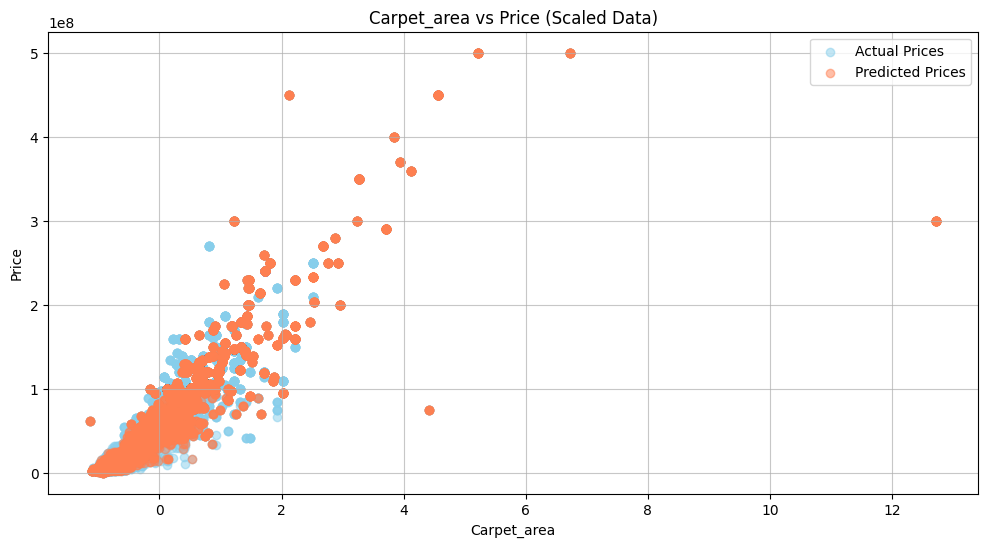


Analysis for Brokerage:
RMSE using only Brokerage: 9611051.57349687


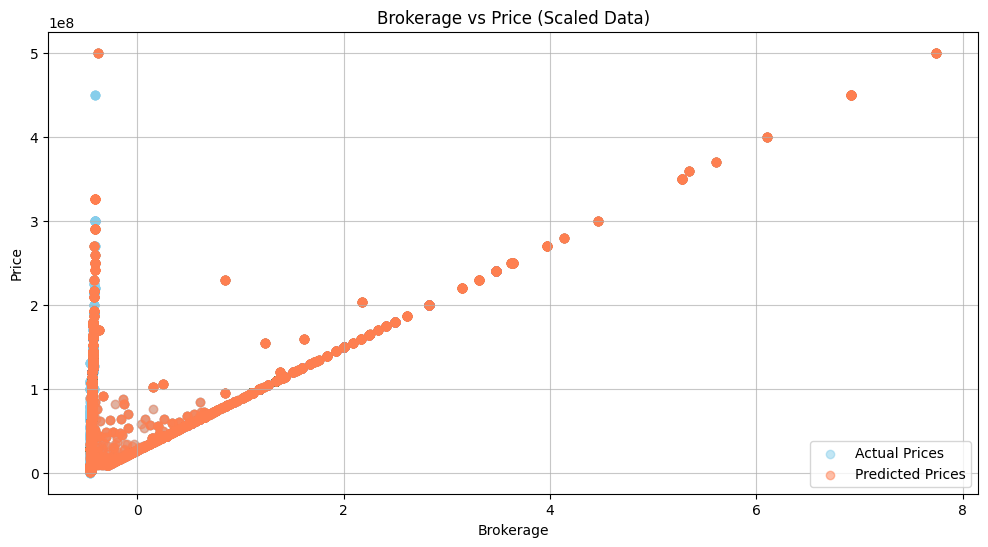


Analysis for Per_sqft_price:
RMSE using only Per_sqft_price: 26662543.056599308


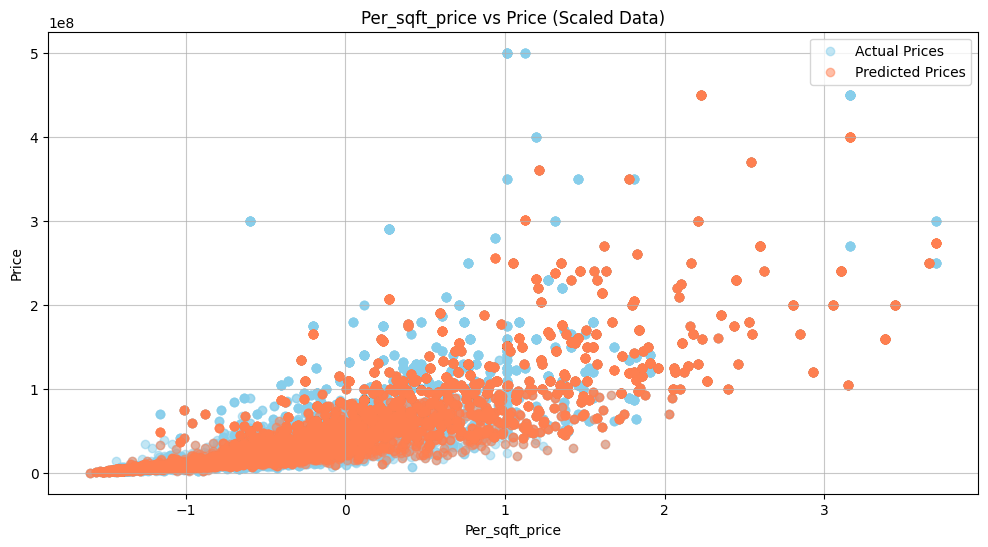

In [96]:
for feature in top_features_scaled:
    print(f"\nAnalysis for {feature}:")

    X_feature_scaled = X_resampled_scaled[[feature]]
    dt_feature_scaled = DecisionTreeRegressor(random_state=42)
    dt_feature_scaled.fit(X_feature_scaled, y_resampled)

    preds_scaled = dt_feature_scaled.predict(X_feature_scaled)

    rmse_scaled = np.sqrt(mean_squared_error(y_resampled, preds_scaled))
    print(f"RMSE using only {feature}:", rmse_scaled)

    plt.figure(figsize=(12, 6))
    plt.scatter(X_feature_scaled, y_resampled, color='skyblue', alpha=0.5, label='Actual Prices')
    plt.scatter(X_feature_scaled, preds_scaled, color='coral', alpha=0.5, label='Predicted Prices')
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.title(f'{feature} vs Price (Scaled Data)')
    plt.legend()
    plt.grid(alpha=0.7)
    plt.show()

The RMSE score for our model given all features was around `14055`. The top three features: `Carpet_Area`, `Brokerage`, and `Per_sqft_price` individually had RMSE scores of `12941201.09`, `9556300.09`, `26662543.05` respectively. This indicates that even though these features individually do not perform too badly, they provide the most information to the model when combined together. This is because the model can learn the relationships between these features and the target variable better when they are used together rather than individually. 

## Bonus Challenge

### Task 1:Advanced Imbalance Handling

In [98]:
train_df1

,Furnishing,Buildup_area,Carpet_area,Bathrooms,Parking,Price,Brokerage,Floor,Per_sqft_price,BHK,Total_bedrooms,price_category
0,1,615.0,508.043150,1.0,0,14500000,14500000.0,7.0,23580.0,2.0,2.0,2
1,1,1200.0,724.772558,3.0,1,18500000,18500000.0,13.0,15420.0,2.0,2.0,2
2,1,3300.0,2300.000000,5.0,3,125000000,1250000.0,32.0,37880.0,4.0,4.0,3
3,2,800.0,642.570682,1.0,1,16000000,16000000.0,4.0,20000.0,2.0,2.0,2
4,1,2000.0,1602.321210,4.0,2,85000000,85000000.0,12.0,42500.0,3.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6251,1,580.0,386.000000,1.0,0,13000000,130000.0,23.0,22410.0,1.0,1.0,2
6252,1,796.0,680.000000,2.0,2,20000000,200000.0,48.0,25130.0,2.0,2.0,2
6253,1,700.0,700.000000,2.0,1,16000000,190000.0,18.0,22920.0,2.0,2.0,2
6254,2,955.0,710.000000,2.0,1,18200000,190000.0,18.0,19110.0,2.0,2.0,2


In [ ]:
X_advanced = train_df1.drop(columns=['price_category'])
y_advanced = train_df1['price_category']

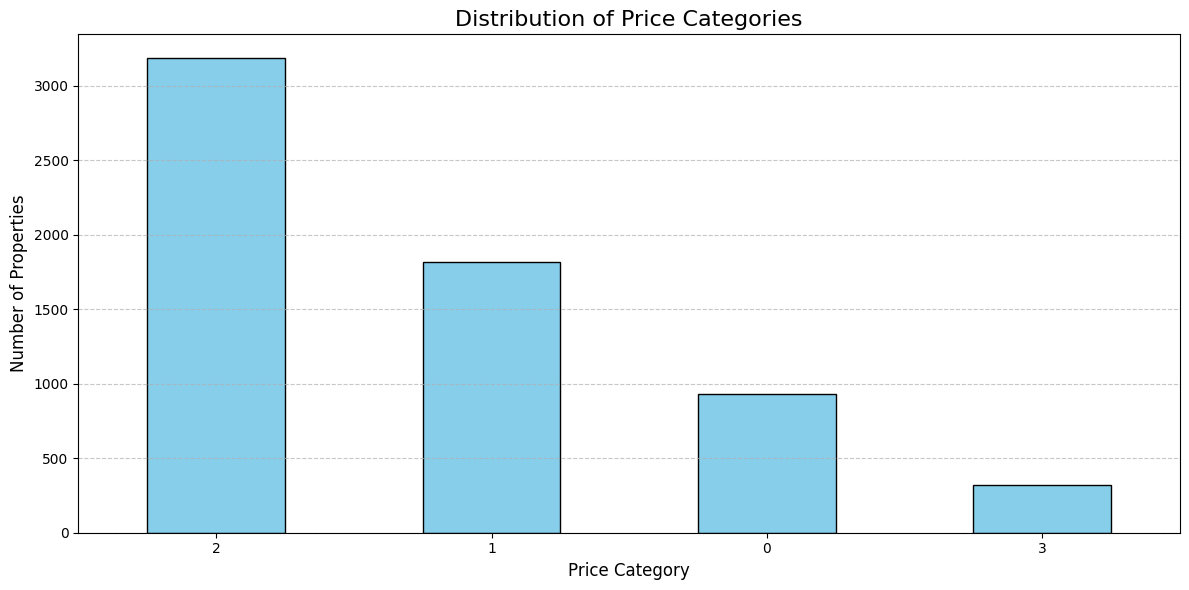

In [101]:
# plot price category
plt.figure(figsize=(12, 6))
y_advanced.value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Price Categories', fontsize=16)
plt.xlabel('Price Category', fontsize=12)
plt.ylabel('Number of Properties', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

SMOTE (Synthetic Minority Over Sampling Technique) is a popular technique used to handle imbalanced datasets. It works by generating synthetic data points for the minority class by interpolating between existing data points. This helps to balance the distribution of the target variable in the dataset and improve the performance of machine learning models. SMOTE is a powerful technique that can help improve the performance of machine learning models on imbalanced datasets.

In [104]:
# apply SMOTE
smote = SMOTE(random_state=42)
X_resampled_smote, y_resampled_smote = smote.fit_resample(X_advanced, y_advanced)

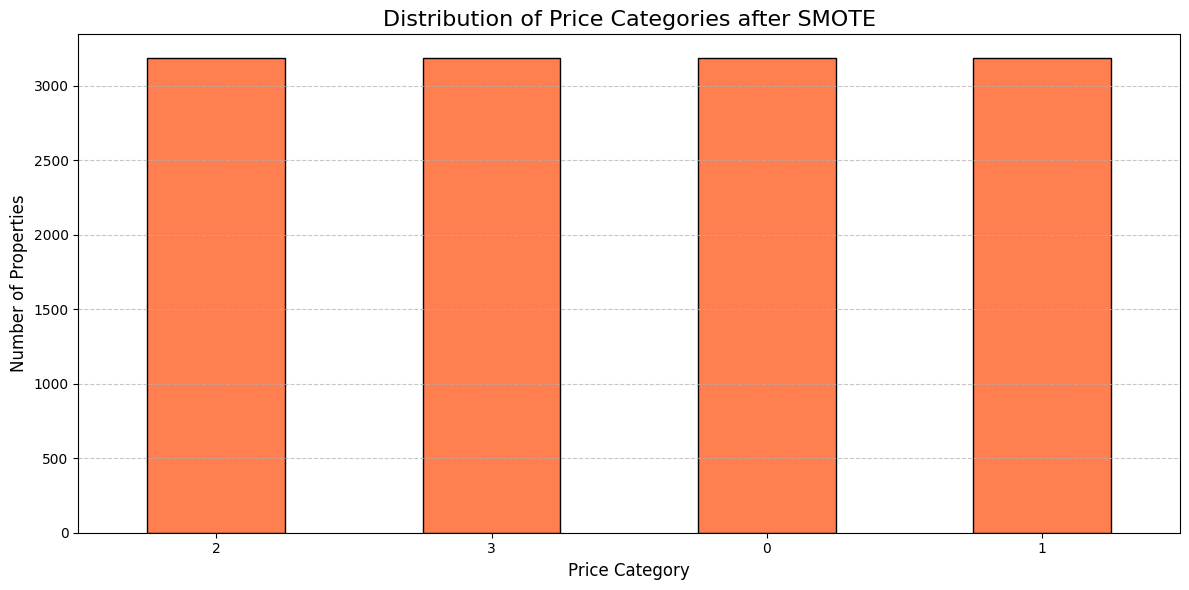

In [105]:
# plotting the distribution of price categories after SMOTE
plt.figure(figsize=(12, 6))
y_resampled_smote.value_counts().plot(kind='bar', color='coral', edgecolor='black')
plt.title('Distribution of Price Categories after SMOTE', fontsize=16)
plt.xlabel('Price Category', fontsize=12)
plt.ylabel('Number of Properties', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [117]:
# df after SMOTE
df_smote = pd.concat([X_resampled_smote, y_resampled_smote], axis=1)
df_smote.drop(columns='price_category', inplace=True)
df_smote

,Furnishing,Buildup_area,Carpet_area,Bathrooms,Parking,Price,Brokerage,Floor,Per_sqft_price,BHK,Total_bedrooms
0,1,615.000000,508.043150,1.000000,0,14500000,14500000.0,7.000000,23580.000000,2.0,2.000000
1,1,1200.000000,724.772558,3.000000,1,18500000,18500000.0,13.000000,15420.000000,2.0,2.000000
2,1,3300.000000,2300.000000,5.000000,3,125000000,1250000.0,32.000000,37880.000000,4.0,4.000000
3,2,800.000000,642.570682,1.000000,1,16000000,16000000.0,4.000000,20000.000000,2.0,2.000000
4,1,2000.000000,1602.321210,4.000000,2,85000000,85000000.0,12.000000,42500.000000,3.0,3.000000
...,...,...,...,...,...,...,...,...,...,...,...
12735,1,2440.804694,2340.804694,4.000000,1,150000000,1500000.0,60.024797,63077.163314,4.0,4.000000
12736,1,5279.687374,5844.559401,2.533854,3,450000000,450000000.0,15.368490,85939.871617,4.0,4.000000
12737,1,2923.529379,2623.304006,1.381450,3,180000000,180000000.0,15.304813,61585.027423,4.0,4.000000
12738,0,1788.407156,1594.162384,1.000000,1,95000000,95000000.0,7.629628,53275.933647,3.0,2.629628


In [118]:
X_smote = df_smote.drop(columns=['Price'])
y_smote = df_smote['Price']

ADASYN (Adaptive Synthetic Sampling) is another popular technique used to handle imbalanced datasets. It works by generating synthetic data points for the minority class based on the density of the data points in the feature space. This helps to balance the distribution of the target variable in the dataset and improve the performance of machine learning models. ADASYN is a powerful technique that can help improve the performance of machine learning models on imbalanced datasets.

In [106]:
# apply ADASYN
adasyn = ADASYN(random_state=42)
X_resampled_adasyn, y_resampled_adasyn = adasyn.fit_resample(X_advanced, y_advanced)

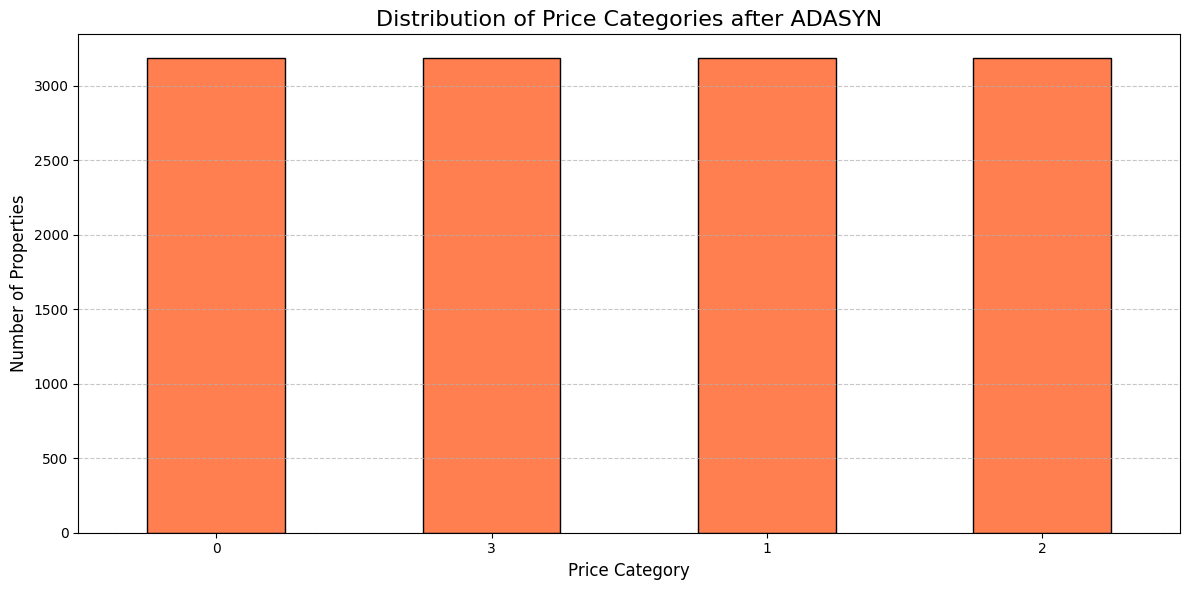

In [107]:
# plotting the distribution of price categories after ADASYN
plt.figure(figsize=(12, 6))
y_resampled_adasyn.value_counts().plot(kind='bar', color='coral', edgecolor='black')
plt.title('Distribution of Price Categories after ADASYN', fontsize=16)
plt.xlabel('Price Category', fontsize=12)
plt.ylabel('Number of Properties', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [122]:
# df after ADASYN
df_adasyn = pd.concat([X_resampled_adasyn, y_resampled_adasyn], axis=1)
df_adasyn.drop(columns='price_category', inplace=True)
df_adasyn

,Furnishing,Buildup_area,Carpet_area,Bathrooms,Parking,Price,Brokerage,Floor,Per_sqft_price,BHK,Total_bedrooms
0,1,615.000000,508.043150,1.000000,0,14500000,1.450000e+07,7.000000,23580.000000,2.000000,2.000000
1,1,1200.000000,724.772558,3.000000,1,18500000,1.850000e+07,13.000000,15420.000000,2.000000,2.000000
2,1,3300.000000,2300.000000,5.000000,3,125000000,1.250000e+06,32.000000,37880.000000,4.000000,4.000000
3,2,800.000000,642.570682,1.000000,1,16000000,1.600000e+07,4.000000,20000.000000,2.000000,2.000000
4,1,2000.000000,1602.321210,4.000000,2,85000000,8.500000e+07,12.000000,42500.000000,3.000000,3.000000
...,...,...,...,...,...,...,...,...,...,...,...
12739,1,1994.560893,1684.682905,2.054391,2,95000000,8.683800e+07,46.343062,47749.450751,3.527196,3.054391
12740,0,1864.909375,1696.724707,1.200481,2,95000000,9.344809e+07,13.312740,50944.747596,3.100240,3.100240
12741,1,1886.889773,1698.776316,2.327681,2,95000000,8.472248e+07,43.183538,50352.967648,3.663840,3.663840
12742,1,1841.135651,1643.500201,2.411357,2,95000000,8.407475e+07,47.461200,51730.611856,3.705678,4.000000


In [123]:
X_adasyn = df_adasyn.drop(columns=['Price'])
y_adasyn = df_adasyn['Price']

### Task 2:Ensemble Learning: Random Forest

In [110]:
# Random Forest Classifier
rf = RandomForestRegressor(random_state=42)
rf.fit(X_resampled, y_resampled)

RandomForestRegressor(random_state=42)

In [111]:
rf.score(X_test, y_test)

0.9927723145914475

#### On scaled data

In [112]:
rf_scaled = RandomForestRegressor(random_state=42)
rf_scaled.fit(X_resampled_scaled, y_resampled)

RandomForestRegressor(random_state=42)

In [113]:
rf_scaled.score(X_test_scaled, y_test)

0.9934655738236952

We see that the performance for Random Forest regressor improved upon scaling the data. This is because Random Forest is an ensemble learning technique that combines multiple decision trees to make predictions. By scaling the data, we are able to improve the performance of the individual decision trees in the Random Forest, which in turn improves the overall performance of the Random Forest model. This indicates that scaling the data can help improve the performance of ensemble learning techniques like Random Forest even if it does not have a significant impact on individual decision trees.

The performance of a Random Forest Regressor is better than that of a Decision Tree Regressor. This is because Random Forest is an ensemble learning technique that combines multiple decision trees to make predictions. This helps to reduce overfitting and improve the generalization of the model. The Random Forest Regressor performs better than the Decision Tree Regressor on the test data, indicating that it is a more robust model that can generalize better to unseen data. 

Trade-offs between Decision Tree and Random Forest:
- Decision Tree:
    - Pros: Easy to interpret, fast to train, can handle non-linear relationships
    - Cons: Prone to overfitting, sensitive to noise and outliers, may not generalize well to unseen data
- Random Forest:
    - Pros: Reduces overfitting, improves generalization, robust to noise and outliers
    - Cons: More complex, slower to train, harder to interpret

#### On SMOTE oversampled data

In [120]:
rf_smote = RandomForestRegressor(random_state=42)
rf_smote.fit(X_smote, y_smote)

RandomForestRegressor(random_state=42)

In [121]:
rf_smote.score(X_test, y_test)

0.9972429237906357

#### On ADASYN oversampled data

In [124]:
rf_adasyn = RandomForestRegressor(random_state=42)
rf_adasyn.fit(X_adasyn, y_adasyn)

RandomForestRegressor(random_state=42)

In [125]:
rf_adasyn.score(X_test, y_test)

0.9914390902329661

We see that using SMOTE to handle imbalance in the dataset greatly improved performance of random forest regressor compared to Random oversampling. This is because SMOTE generates synthetic data points for the minority class by interpolating between existing data points. This helps to balance the distribution of the target variable in the dataset and improve the performance of machine learning models. SMOTE is a powerful technique that can help improve the performance of machine learning models on imbalanced datasets.\
On the other hand, ADASYN slightly decreased the performance of the model compared to Random oversampling. This is because ADASYN generates synthetic data points for the minority class based on the density of the data points in the feature space. This can lead to overfitting if not done properly and may not provide enough data points for the model to learn from.\
Thus, SMOTE is a better choice for handling imbalanced datasets compared to ADASYN in this case, especially for our dataset where the imbalance is significant.